# Microsoft Studio: Box Office Analysis
**Author:** James Pheby


<img src="images/neon.jpg" style="width: 700px;"/>

## Overview

Descriptive analysis of the last 15 years of box office profits to produce recommendations for Microsoft Studio on which types of movies it should produce, when it should produce them and what features the movies should include. 
-  Wait until the major markets have fully reopened after the pandemic lockdowns before releasing movies
-  Early blockbuster movies should be in the Action/Adventure/Sci-Fi genre, with lower budget movies in the Horror/Mystery/Thriller genre
-  The studio should try and recruit Mark Ruffalo and Joss Whedon or J.J Abrams for the Adventure/Action/Sci-Fi movies and Rose Byrne and Jordan Peele for the Horror/Mystery/Thriller movies

## Business Problem

-  Maximise the likelihood of producing profitable movies for stakeholders

-  Make efficient use of budgets for the studio's debut movies

-  Recruit crew with a track record of producing profitable and acclaimed movies

-  Include features often associated with successful movies in the chosen genre

## Data Understanding
Data drawn from three sources:
-  Box office performance of more the 6,000 movies from The Numbers website
-  Genre, crew, and release date of each movie from Open Movie Database (OMDB). This also contains average user ratings from Rotten Tomatoes, IMDb and Metacritic 
-  Keywords attached to each movie from The Movie DB (TMDB)



In [1]:
from selenium import webdriver
from PIL import Image
import os
from os import path
import time
import random
import pandas as pd
import requests
import json
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import code.visualizations as viz
import code.data_preparation as dprep

<img src="images/reel.jpg" style="width: 700px;"/>

**For notebook containing the data acquisiton code, see 'student_pt2_data_gathering.ipynb'**

### OPEN LIST, DATAFRAMES & MOVIE METADATA DICTIONARY 

**ALL CONSTRUCTED FROM SCRAPING NUMBERS WEBSITE AND CALLING OMBD API**

* **financials_list** - all financial data from The Numbers website stored as a list of lists, with each list a movie
* **numbers_df** - a dataframe of the list of lists
* **financials_15_df** - numbers_df but filtered for movies in last 15 years only
* **omdb_attrs** - dictionary of movie metadata retrieved from OMDB website
* **attributes_df** - dataframe constructed from omdb_attrs

In [3]:
(financials_list, numbers_df, financials_15_df, omdb_attrs, attributes_df) = dprep.open_files()

### financials_list

In [4]:
financials_list[0:3]

[['Apr 23, 2019',
  'Avengers: Endgame',
  ' $400,000,000',
  ' $858,373,000',
  ' $2,797,800,564'],
 ['May 20, 2011',
  'Pirates of the Caribbean: On Stranger Tides',
  ' $379,000,000',
  ' $241,071,802',
  ' $1,045,713,802'],
 ['Apr 22, 2015',
  'Avengers: Age of Ultron',
  ' $365,000,000',
  ' $459,005,868',
  ' $1,395,316,979']]

### omdb_attrs

In [5]:
omdb_attrs['tt4154796']

{'Actors': 'Robert Downey Jr., Chris Evans, Mark Ruffalo',
 'Director': 'Anthony Russo, Joe Russo',
 'Genre': 'Action, Adventure, Drama',
 'Plot': "After the devastating events of Avengers: Infinity War (2018), the universe is in ruins. With the help of remaining allies, the Avengers assemble once more in order to reverse Thanos' actions and restore balance to the universe.",
 'Rated': 'PG-13',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '8.4/10'},
  {'Source': 'Rotten Tomatoes', 'Value': '94%'},
  {'Source': 'Metacritic', 'Value': '78/100'}],
 'Runtime': '181 min',
 'Writer': 'Christopher Markus, Stephen McFeely, Stan Lee',
 'Title': 'Avengers: Endgame',
 'imdbRating': '8.4',
 'imdbVotes': '937,294',
 'RottenRating': '94',
 'MetacriticRating': '78',
 'Actor_List': ['Robert Downey Jr.', 'Chris Evans', 'Mark Ruffalo'],
 'Genre_List': ['Action', 'Adventure', 'Drama'],
 'Writer_List': ['Christopher Markus', 'Stephen McFeely', 'Stan Lee'],
 'Director_List': ['Anthony Russo'

### numbers_df

In [6]:
display(numbers_df.head(3), numbers_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5133 entries, 0 to 5132
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   5133 non-null   object 
 1   release_year            5133 non-null   int64  
 2   release_month           5110 non-null   object 
 3   release_day             5110 non-null   float64
 4   budget_$                5133 non-null   int64  
 5   domestic_box_office_$   5133 non-null   int64  
 6   worldwide_box_office_$  5133 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 280.8+ KB


,title,release_year,release_month,release_day,budget_$,domestic_box_office_$,worldwide_box_office_$
0,Avengers: Endgame,2019,Apr,23.0,400000000,858373000,2797800564
1,Pirates of the Caribbean: On Stranger Tides,2011,May,20.0,379000000,241071802,1045713802
2,Avengers: Age of Ultron,2015,Apr,22.0,365000000,459005868,1395316979


None

### financials_15_df

In [7]:
display(financials_15_df.head(3), financials_15_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2407 entries, 0 to 2406
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   imdb_code               2407 non-null   object 
 1   title                   2407 non-null   object 
 2   release_year            2407 non-null   int64  
 3   release_month           2407 non-null   object 
 4   release_day             2407 non-null   int64  
 5   budget_$                2407 non-null   int64  
 6   domestic_box_office_$   2407 non-null   int64  
 7   worldwide_box_office_$  2407 non-null   int64  
 8   profit_loss_$           2407 non-null   int64  
 9   return_pct              2407 non-null   float64
 10  domestic_%              2407 non-null   float64
dtypes: float64(2), int64(6), object(3)
memory usage: 207.0+ KB


,imdb_code,title,release_year,release_month,release_day,budget_$,domestic_box_office_$,worldwide_box_office_$,profit_loss_$,return_pct,domestic_%
0,tt4154796,Avengers: Endgame,2019,Apr,23,400000000,858373000,2797800564,2397800564,599.450141,30.680278
1,tt1298650,Pirates of the Caribbean: On Stranger Tides,2011,May,20,379000000,241071802,1045713802,666713802,175.913932,23.053325
2,tt2395427,Avengers: Age of Ultron,2015,Apr,22,365000000,459005868,1395316979,1030316979,282.278624,32.896172


None

### attributes_df

In [8]:
display(attributes_df.head(3), attributes_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2405 entries, 0 to 2404
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   imdb_code         2405 non-null   object 
 1   Genre_List        2405 non-null   object 
 2   Actor_List        2405 non-null   object 
 3   Director_List     2405 non-null   object 
 4   Writer_List       2405 non-null   object 
 5   Rated             2269 non-null   object 
 6   Run_Time          2405 non-null   float64
 7   MetacriticRating  2201 non-null   float64
 8   RottenRating      2215 non-null   float64
 9   imdbRating        2336 non-null   float64
 10  imdb_votes        2405 non-null   float64
 11  mean_rating       2168 non-null   float64
dtypes: float64(6), object(6)
memory usage: 225.6+ KB


,imdb_code,Genre_List,Actor_List,Director_List,Writer_List,Rated,Run_Time,MetacriticRating,RottenRating,imdbRating,imdb_votes,mean_rating
0,tt4154796,"[Action, Adventure, Drama]","[Robert Downey Jr., Chris Evans, Mark Ruffalo]","[Anthony Russo, Joe Russo]","[Christopher Markus, Stephen McFeely, Stan Lee]",PG-13,181.0,78.0,94.0,84.0,937294.0,85.333333
1,tt1298650,"[Action, Adventure, Fantasy]","[Johnny Depp, Penélope Cruz, Ian McShane]",[Rob Marshall],"[Ted Elliott, Terry Rossio, Stuart Beattie]",PG-13,136.0,45.0,33.0,66.0,497245.0,48.000000
2,tt2395427,"[Action, Adventure, Sci-Fi]","[Robert Downey Jr., Chris Evans, Mark Ruffalo]",[Joss Whedon],"[Joss Whedon, Stan Lee, Jack Kirby]",PG-13,141.0,66.0,76.0,73.0,792951.0,71.666667


None

<img src="images/screen.jpg" style="width: 700px;"/>

## Data Preparation

The worldwide box office takings for the last 15 years were cleaned, so they could be stored as integers

Any films with corrupt data, often giving corrupt release date, was filtered out in the process

Any movie with a budget of less than $1m was filtered out when making the dataframes, as it is either corrupted or anomalous, with the potential to skew the return on investment figures

Any movie with takings only outside the USA, or with no worldwide takings recorded were removed, as either corrupted or not relevant to the business problem

Any other null values were treated according to the analysis, and is explained in the code

We change any N/A empty ratings into NaN in order to make the mean_rating column numerical. We can leave those in as it is not a much used column, and when it is used, it is easy to deal with them in a way most appropriate to the anlaysis

Each movie released in the last 15 years was analysed to find the most profitable genres

Within those genres, the movies were analysed to find which actors, directors and writers were most successful, and the runtime and release month most associated with hits



In [4]:
# make dataframe that only includes profitable films
financials_hits_df = financials_15_df.copy()
financials_hits_df = financials_hits_df[financials_hits_df['profit_loss_$'] > 0]

In [5]:
# do same but for flops
financials_flops_df = financials_15_df.copy()
financials_flops_df = financials_flops_df[financials_flops_df['profit_loss_$'] <= 0]

In [6]:
# make three joined dataframes, one for each financial dataframe. Fill any missing
# values in the categorical columns

def make_joined_dfs(financials_15_df, financials_hits_df, financials_flops_df, attributes_df):
    financial_attributes_join = financials_15_df.merge(attributes_df, how='left', on='imdb_code')
    financial_attributes_hits_join = financials_hits_df.merge(attributes_df, how='left', on='imdb_code')
    financial_attributes_flops_join = financials_flops_df.merge(attributes_df, how='left', on='imdb_code')
    
    financial_attributes_join.fillna({'Genre_List':'N/A', 'Actor_List':'N/A', 'Director_List': 'N/A', 'Writer_List': 'N/A', 'Rated': 'N/A'}, inplace=True)
    financial_attributes_hits_join.fillna({'Genre_List':'N/A', 'Actor_List':'N/A', 'Director_List': 'N/A', 'Writer_List': 'N/A', 'Rated': 'N/A'}, inplace=True)
    financial_attributes_flops_join.fillna({'Genre_List':'N/A', 'Actor_List':'N/A', 'Director_List': 'N/A', 'Writer_List': 'N/A', 'Rated': 'N/A'}, inplace=True)
    
    return(financial_attributes_join, financial_attributes_hits_join, financial_attributes_flops_join)

(financial_attributes_join, financial_attributes_hits_join, financial_attributes_flops_join) = make_joined_dfs(financials_15_df, financials_hits_df, financials_flops_df, attributes_df)


### financial_attributes_join

In [12]:
display(financial_attributes_join.head(), financial_attributes_join.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2407 entries, 0 to 2406
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   imdb_code               2407 non-null   object 
 1   title                   2407 non-null   object 
 2   release_year            2407 non-null   int64  
 3   release_month           2407 non-null   object 
 4   release_day             2407 non-null   int64  
 5   budget_$                2407 non-null   int64  
 6   domestic_box_office_$   2407 non-null   int64  
 7   worldwide_box_office_$  2407 non-null   int64  
 8   profit_loss_$           2407 non-null   int64  
 9   return_pct              2407 non-null   float64
 10  domestic_%              2407 non-null   float64
 11  Genre_List              2407 non-null   object 
 12  Actor_List              2407 non-null   object 
 13  Director_List           2407 non-null   object 
 14  Writer_List             2407 non-null   

,imdb_code,title,release_year,release_month,release_day,budget_$,domestic_box_office_$,worldwide_box_office_$,profit_loss_$,return_pct,...,Actor_List,Director_List,Writer_List,Rated,Run_Time,MetacriticRating,RottenRating,imdbRating,imdb_votes,mean_rating
0,tt4154796,Avengers: Endgame,2019,Apr,23,400000000,858373000,2797800564,2397800564,599.450141,...,"[Robert Downey Jr., Chris Evans, Mark Ruffalo]","[Anthony Russo, Joe Russo]","[Christopher Markus, Stephen McFeely, Stan Lee]",PG-13,181.0,78.0,94.0,84.0,937294.0,85.333333
1,tt1298650,Pirates of the Caribbean: On Stranger Tides,2011,May,20,379000000,241071802,1045713802,666713802,175.913932,...,"[Johnny Depp, Penélope Cruz, Ian McShane]",[Rob Marshall],"[Ted Elliott, Terry Rossio, Stuart Beattie]",PG-13,136.0,45.0,33.0,66.0,497245.0,48.000000
2,tt2395427,Avengers: Age of Ultron,2015,Apr,22,365000000,459005868,1395316979,1030316979,282.278624,...,"[Robert Downey Jr., Chris Evans, Mark Ruffalo]",[Joss Whedon],"[Joss Whedon, Stan Lee, Jack Kirby]",PG-13,141.0,66.0,76.0,73.0,792951.0,71.666667
3,tt2488496,Star Wars Ep. VII: The Force Awakens,2015,Dec,16,306000000,936662225,2064615817,1758615817,574.711051,...,"[Daisy Ridley, John Boyega, Oscar Isaac]",[J.J. Abrams],"[Lawrence Kasdan, J.J. Abrams, Michael Arndt]",PG-13,138.0,80.0,93.0,78.0,884789.0,83.666667
4,tt4154756,Avengers: Infinity War,2018,Apr,25,300000000,678815482,2044540523,1744540523,581.513508,...,"[Robert Downey Jr., Chris Hemsworth, Mark Ruff...","[Anthony Russo, Joe Russo]","[Christopher Markus, Stephen McFeely, Stan Lee]",PG-13,149.0,68.0,85.0,84.0,922928.0,79.000000


None

**DATAFRAMES** <br><br>
* **numbers_df** - a dataframe of the list of lists
* **financials_15_df** - numbers_df but filtered for movies in last 15 years only
* **attributes_df** - dataframe constructed from omdb movie metadata
* **financials_hits_df** - same data but only including profitable movies <br>
* **financials_flops_df** - same data but only including loss-making movies <br>
<br>

**JOINED**

* **financial_attributes_join** - all financial data joined with attributes
* **financial_attributes_hits_join** - hits financial data joined with attributes <br>
* **financial_attributes_flops_join** - flops financial data joined with attributes <br>

## Data Analysis

### How have the mean takings per movie changed over the last 15 years?

In [16]:
ww_df = financial_attributes_join.groupby('release_year').mean()
ww_df['worldwide_box_office_$'] = ww_df['worldwide_box_office_$']/1000000
ww_df = ww_df[:15]

In [17]:
def lineplotter(df, x_col, y_col, title, x_lab, y_lab, file, h=None, log=None):
    '''takes in df, and its columns to create lineplot'''
    fig, ax = plt.subplots(figsize=(12, 10))
    sns.set_context('poster')
    ax = sns.lineplot(data=df, x=x_col, y=y_col, hue=h)
    plt.title(title, y=1.05)
    plt.xlabel(x_lab, fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.ylabel(y_lab, fontsize=20)
    fig.tight_layout()
    if log=='y':
        ax.set_yscale('log')
    if h=='variable':
        plt.legend(loc='lower left', title='Genre')
    plt.savefig(file);
    return ax
    

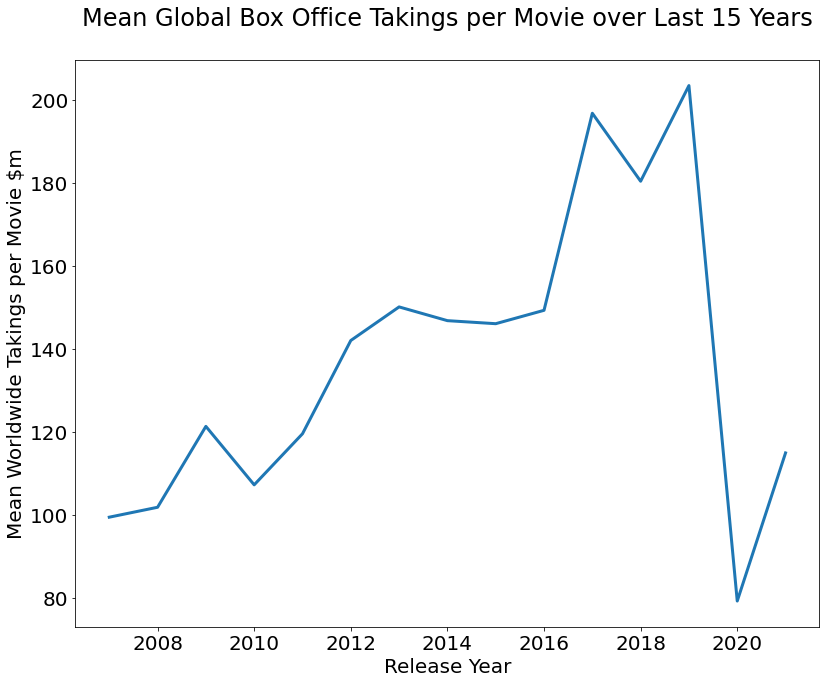

In [15]:
lineplotter(ww_df, "release_year", "worldwide_box_office_$", 'Mean Global Box Office Takings per Movie over Last 15 Years', 'Release Year', 'Mean Worldwide Takings per Movie $m', 'images/worldwide_bo.png');

* <font color='red'>**Despite a steady rise since 2007, mean takings per movie in the worldwide market fell more than 50% during lockdown, and have only just started to recover**</font> 

### Which genres produced films with the highest mean profit?

In [18]:
genre_profit_df = dprep.feature_v_financialMean_df_maker('Genre_List', 'profit_loss_$', financial_attributes_join, genre_filter=None)
genre_profit_df.head(2)

,Genre_List,release_year,release_day,budget_$,domestic_box_office_$,worldwide_box_office_$,profit_loss_$,return_pct,domestic_%,Run_Time,MetacriticRating,RottenRating,imdbRating,imdb_votes,mean_rating,Counts
0,Adventure,2013.664247,15.713249,101.763731,122.193983,347.021609,245.257878,230.429483,40.207722,109.310345,54.552239,56.142322,64.283636,216384.468240,58.333966,551.0
1,Animation,2013.457627,15.870056,89.977208,122.236041,332.155995,242.178787,267.113137,39.976897,90.796610,58.250000,63.530120,65.563218,135395.361582,62.404040,177.0


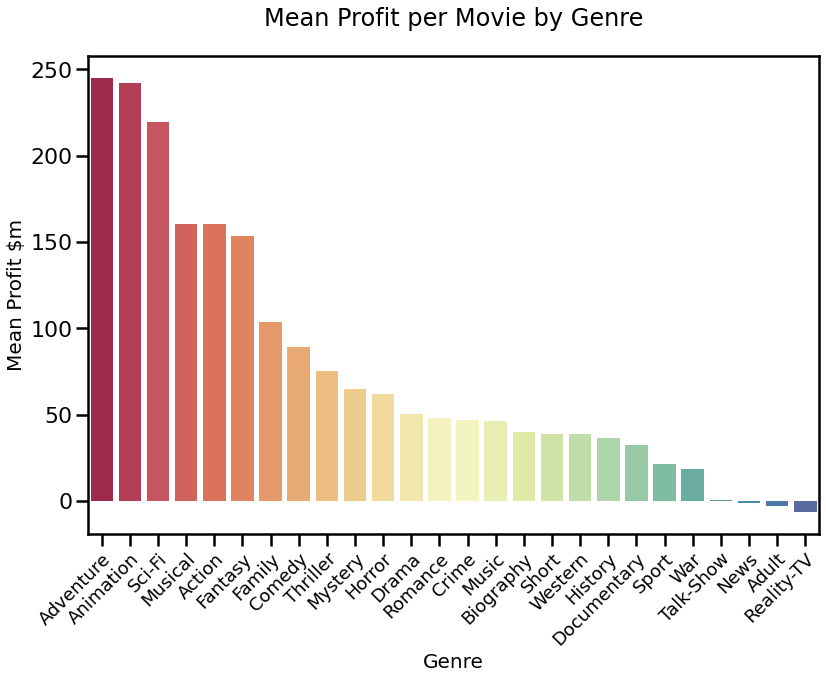

In [19]:
viz.seaborn_bar(genre_profit_df, 'Genre_List', 'profit_loss_$', 'Genre', 'Mean Profit $m', 'Mean Profit per Movie by Genre', 'images/profit_v_genre.png');

* <font color='red'>**On average, Adventure, Animation and Sci-Fi produced the most profitable films over the last 15
    years**</font> 

### Which genres produced films with the highest percentage return on investment (ROI)?

In [20]:
genre_roi_df = dprep.feature_v_financialMean_df_maker('Genre_List', 'return_pct', financial_attributes_join, genre_filter=None)
genre_roi_df.head(2)

,Genre_List,release_year,release_day,budget_$,domestic_box_office_$,worldwide_box_office_$,profit_loss_$,return_pct,domestic_%,Run_Time,MetacriticRating,RottenRating,imdbRating,imdb_votes,mean_rating,Counts
0,Horror,2013.359649,15.780702,20.354825,37.022350,82.600688,62.245863,561.317940,51.253195,97.254386,47.433180,45.518349,57.858407,97307.324561,50.479070,228.0
1,Mystery,2012.990783,15.682028,25.304887,39.882141,90.172945,64.868059,507.452937,47.775101,106.073733,52.185714,50.526066,62.548387,142356.138249,55.096154,217.0


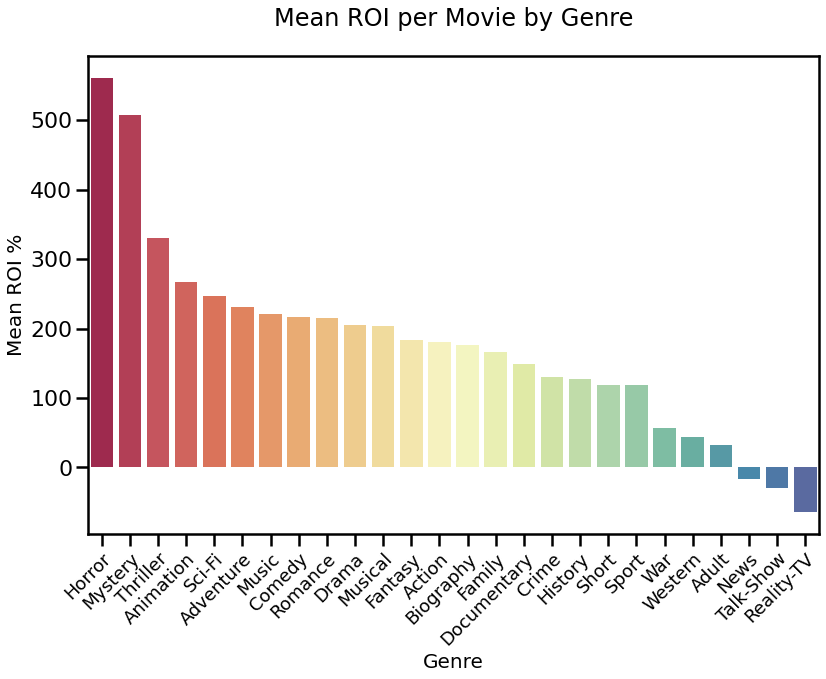

In [21]:
viz.seaborn_bar(genre_roi_df, 'Genre_List', 'return_pct', 'Genre', 'Mean ROI %', 'Mean ROI per Movie by Genre', 'images/ROI_v_genre.png');

* <font color='red'>**On average, Horror, Mystery and Thriller movies produced highest return on investment over the last 15 years**</font> 

### What was the average budget for movies by genre?

In [22]:
genre_budget_df = dprep.feature_v_financialMean_df_maker('Genre_List', 'budget_$', financial_attributes_join, genre_filter=None)
genre_budget_df.head(2)

,Genre_List,release_year,release_day,budget_$,domestic_box_office_$,worldwide_box_office_$,profit_loss_$,return_pct,domestic_%,Run_Time,MetacriticRating,RottenRating,imdbRating,imdb_votes,mean_rating,Counts
0,Adventure,2013.664247,15.713249,101.763731,122.193983,347.021609,245.257878,230.429483,40.207722,109.310345,54.552239,56.142322,64.283636,216384.468240,58.333966,551.0
1,Sci-Fi,2013.420513,14.882051,91.772681,115.017221,311.448473,219.675792,247.468646,42.746964,110.866667,52.865591,53.139785,64.057592,283046.164103,56.708108,195.0


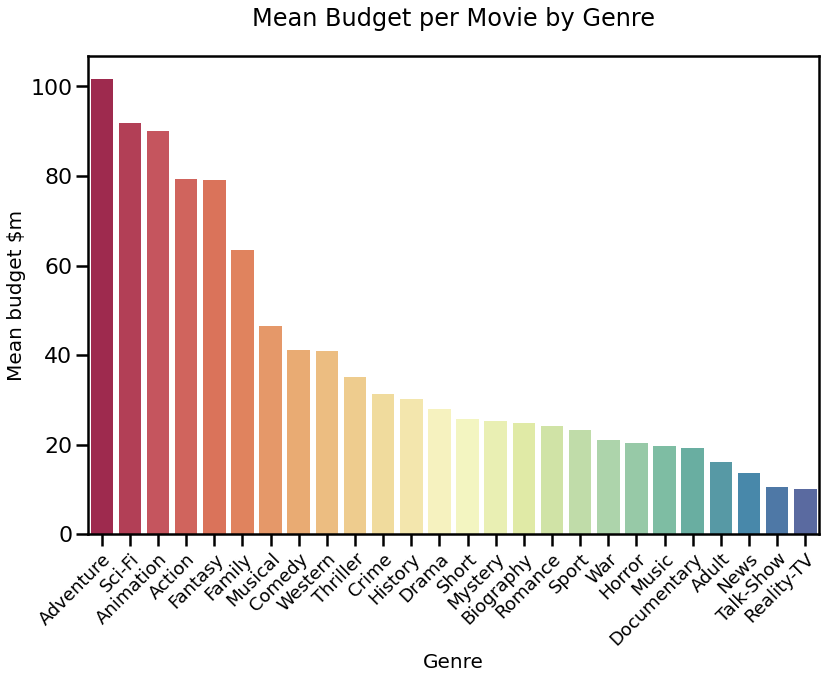

In [23]:
viz.seaborn_bar(genre_budget_df, 'Genre_List', 'budget_$', 'Genre', 'Mean budget $m', 'Mean Budget per Movie by Genre', 'images/budget_v_genre.png');

* <font color='red'>**On average, Adventure, Sci-Fi, Animation and Action movies had the highest budgets over the last 15 years. Of the major genres, Horror, Drama, and Thriller movies had low budgets**</font> 

### How many hits and flops were produced in each genre? - Hits being movies that made a profit, and flops ones that made a loss

In [24]:
filtered_concat_gen_df = dprep.make_profit_loss_df(financial_attributes_join, financial_attributes_flops_join, financial_attributes_hits_join)
filtered_concat_gen_df.head(2)

,Genre_List,All_Counts,Flop_Counts,Hit_Counts,Percent_Hits
0,Adventure,551.0,83.0,468.0,84.936479
1,Action,674.0,143.0,531.0,78.783383


In [25]:
def grouped_bar_genre(filtered_concat_gen_df):
    
    labels = filtered_concat_gen_df['Genre_List'].to_list()
    flop_count = filtered_concat_gen_df['Flop_Counts'].to_list()
    hit_count = filtered_concat_gen_df['Hit_Counts'].to_list()
    percentage = filtered_concat_gen_df['Percent_Hits'].to_list()

    x = np.arange(len(labels))  # the label locations
    width = 0.4  # the width of the bar

    fig, ax = plt.subplots(1, 2, figsize=(22, 10))
    fig.suptitle(f'Bar Charts of Flops and Hits by Genre', y=1.03, fontsize=22)

    rects1 = ax[0].barh(x + width/2, flop_count, width, label='Flops')
    rects2 = ax[0].barh(x - width/2, hit_count, width, label='Hits')

    ax[0].set_xlabel('Scores', fontsize =17)
    ax[0].set_title('Number of Hits and Flops by Genre', fontsize = 20, y = 1.03)
    ax[0].set_yticks(x)
    ax[0].set_yticklabels(labels, fontsize=17)
    ax[0].legend()
    
    width1=0.8
    rects3 = ax[1].barh(x, percentage, width1, color='red')
    ax[1].set_xlabel('Percentage of Hits', fontsize =17)
    ax[1].set_title('Percentage of Hits by Genre', fontsize = 20, y = 1.03)
    ax[1].set_yticks(x)
    ax[1].set_yticklabels(labels, fontsize=17)

    plt.savefig(f'images/flops_v_hits.png', bbox_inches = "tight")
    plt.show()
    

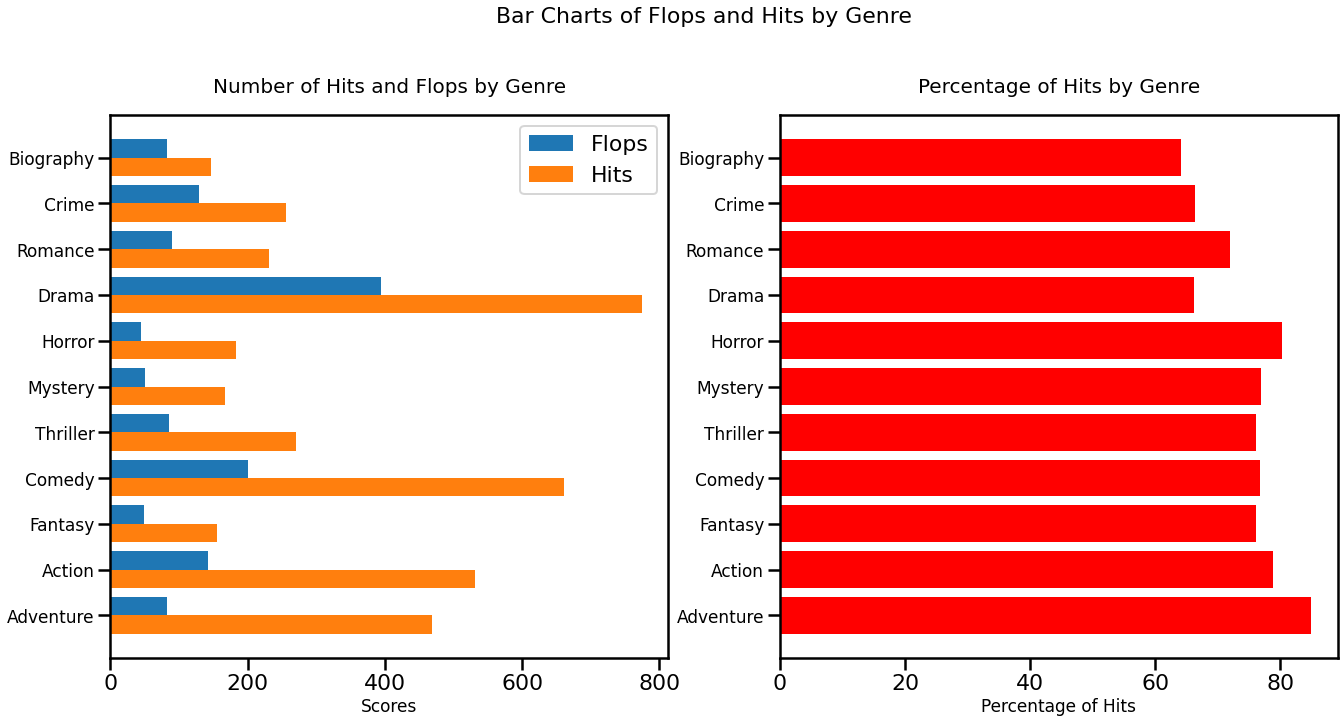

In [26]:
grouped_bar_genre(filtered_concat_gen_df)

* <font color='red'>**Drama, Comedy, Action and Adventure genres produced the most movies** <br>
* **Movies in the Adventure, Horror, Comedy and Thriller genres we the ones most likley to make a profit**</font> 


### What has been the spread of profits/losses in each genre?

In [7]:
def profit_box_plot(financial_attributes_join):
    genre_count = financial_attributes_join.explode('Genre_List')
    both_dic ={}
    for index, row in genre_count.iterrows():
        key = row['Genre_List']
        if key not in both_dic:
            both_dic[key] = []
        both_dic[key].append(row['profit_loss_$']/1000000)
            
    bp_dic = {k:v for k, v in both_dic.items() if len(v)>200}
    labels, data = [*zip(*bp_dic.items())] 
    sns.set_context('poster')
    sns.set_style("whitegrid")
    f, ax = plt.subplots(figsize=(15, 9))
    ax.set_yscale("symlog")
    sns.boxplot(data = data)
    plt.axhline(0, linewidth=3, color='red')
    plt.xticks(range(0, len(labels)), labels, rotation = 0, fontsize=17)
    plt.tick_params(axis="x", labelsize=17)
    plt.xlabel('Genre', fontsize=20)
    plt.ylabel('Profit/Loss $m', fontsize=19)
    plt.title('Profit/Loss Spread of Every Film in each Genre', y = 1.03, fontsize=20)
    plt.savefig(f'images/genre-pl-boxplot.png')
    #fig.tight_layout()
    plt.show();

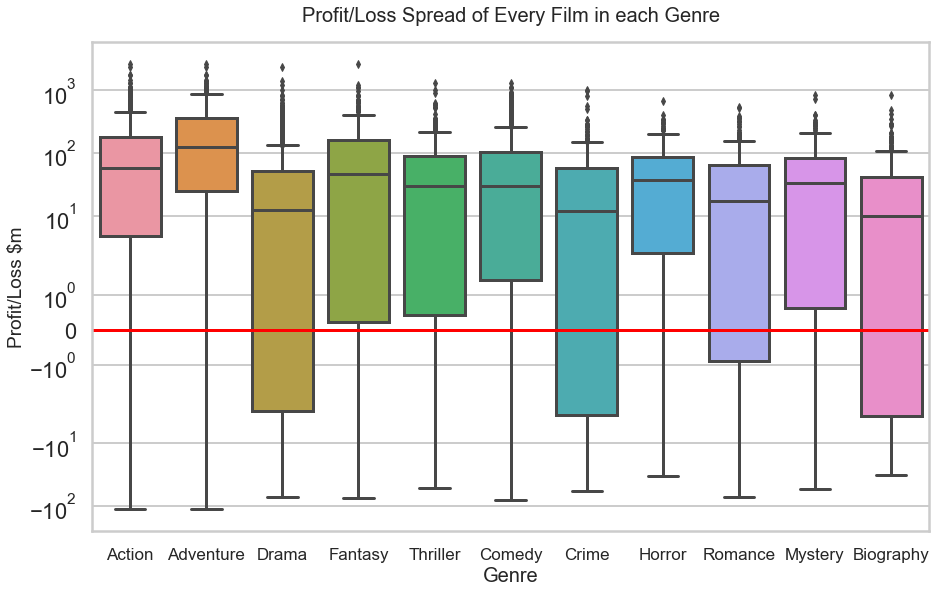

In [8]:
profit_box_plot(financial_attributes_join)

* <font color='red'> **Movies in the Action and Adventure, genres saw the highest median profits, but also sustained the heaviest losses**<br>
* **Horror, Biography, Thriller and Mystery movies sustained the lightest losses, with Thriller, Horror and Mystery movies also having high median profits**</font> 

* <font color='red'> **THE STUDIO SHOULD FOCUS ON HIGH BUDGET ADVENTURE MOVIES AND LOWER BUDGET HORROR MOVIES**<br>
* **WE NOW NEED TO ANALYSE WHAT TYPE OF MOVIES IN EACH OF THESE GENRES HAVE BEEN MOST PROFITABLE**</font> 

### Which subgenre within the Adventure genre has produced the movies with the highest mean profits?

<img src="images/space_shuttle.jpg" style="width: 700px;"/>

In [29]:
adventure_genre_profit_df = dprep.feature_v_financialMean_df_maker('Genre_List', 'profit_loss_$', financial_attributes_join, genre_filter=['Adventure'])
adventure_genre_profit_df.head(2)

,Genre_List,release_year,release_day,budget_$,domestic_box_office_$,worldwide_box_office_$,profit_loss_$,return_pct,domestic_%,Run_Time,MetacriticRating,RottenRating,imdbRating,imdb_votes,mean_rating,Counts
0,Sci-Fi,2013.951807,15.385542,151.214458,200.137162,551.323243,400.108785,257.666363,37.877812,123.963855,55.256098,57.156627,66.329268,423850.240964,59.605691,83.0
1,Thriller,2014.318182,16.590909,124.918182,125.241051,454.195820,329.277638,244.595965,31.625110,122.090909,57.809524,61.714286,66.772727,250649.227273,61.683333,22.0


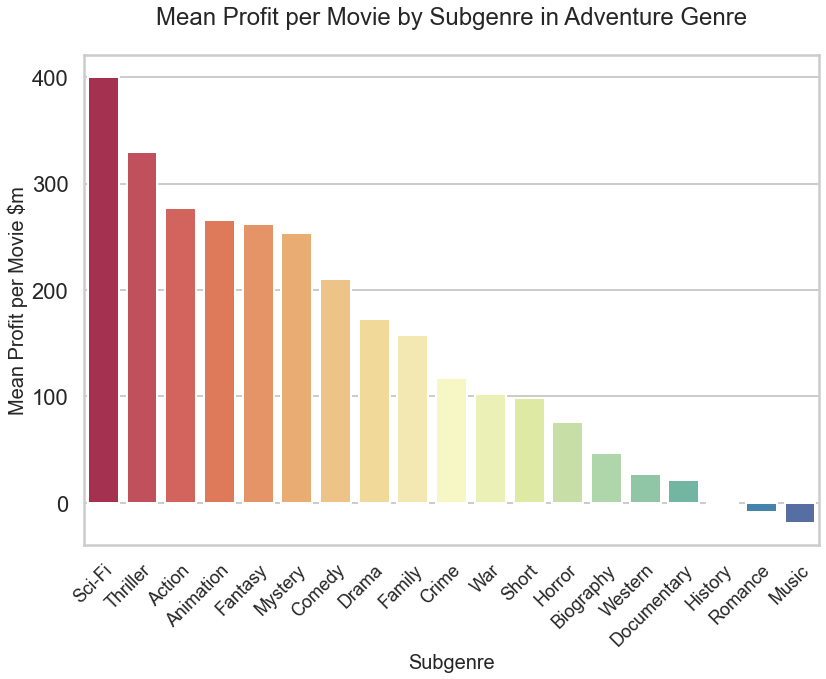

In [30]:
viz.seaborn_bar(adventure_genre_profit_df, 'Genre_List', 'profit_loss_$', 'Subgenre', 'Mean Profit per Movie $m', 'Mean Profit per Movie by Subgenre in Adventure Genre', 'images/ad_budget_v_genre.png');

* <font color='red'> **Sci-Fi was the most profitable subgenre in the Adventure genre**</font> 

### Which subgenre within the Adventure/Sci-Fi genre has produced the movies with the highest mean profits?

In [31]:
adventure_scifi_genre_profit_df = dprep.feature_v_financialMean_df_maker('Genre_List', 'profit_loss_$', financial_attributes_join, genre_filter=['Adventure', 'Sci-Fi'])
adventure_scifi_genre_profit_df.head(2)

,Genre_List,release_year,release_day,budget_$,domestic_box_office_$,worldwide_box_office_$,profit_loss_$,return_pct,domestic_%,Run_Time,MetacriticRating,RottenRating,imdbRating,imdb_votes,mean_rating,Counts
0,Action,2014.09589,15.369863,163.393151,215.119487,591.801945,428.408794,270.610655,35.609008,125.561644,54.638889,57.123288,66.166667,425376.465753,59.337963,73.0
1,Drama,2012.25000,15.250000,99.000000,175.386976,501.997453,402.997453,328.618289,50.552600,127.000000,76.250000,79.250000,76.500000,805332.750000,77.333333,4.0


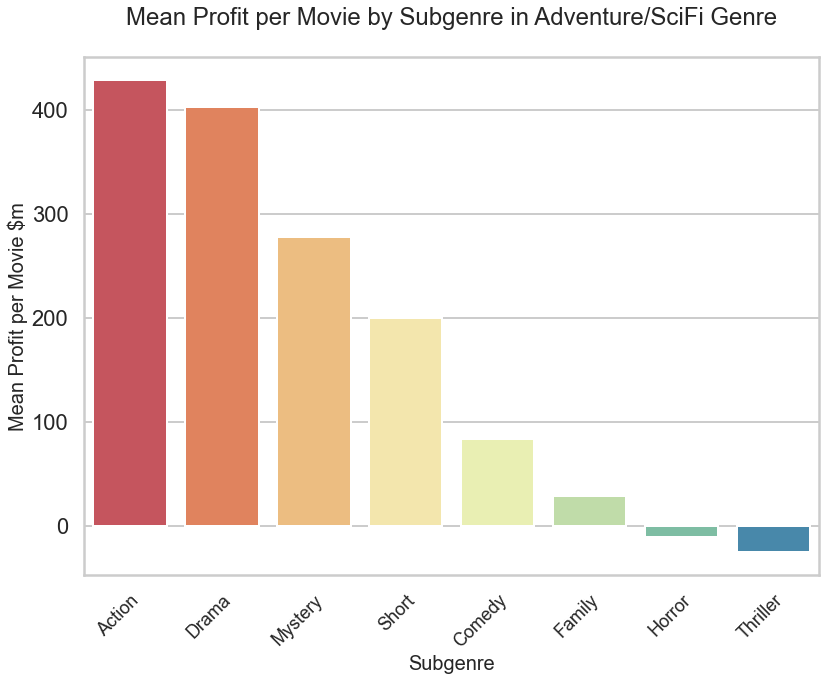

In [32]:
viz.seaborn_bar(adventure_scifi_genre_profit_df, 'Genre_List', 'profit_loss_$', 'Subgenre', 'Mean Profit per Movie $m', 'Mean Profit per Movie by Subgenre in Adventure/SciFi Genre', 'images/ad_scifi_budget_v_genre.png');

* <font color='red'> **Action was the most profitable subgenre in the Adventure/Sci-Fi genre**</font> 

### Which budgets have produced the most profitable movies within the Adventure/Sci-Fi/Action genre?

In [33]:
add_adventure_list=[]
for index, row in financial_attributes_join.iterrows():
    if 'Adventure' in row['Genre_List']:
        add_adventure_list.append(row)
adventure_all = pd.DataFrame(add_adventure_list)
adventure_all_s = dprep.budget_prep(adventure_all, 'adventure')
adventure_all_s.head(2)


,imdb_code,title,release_year,release_month,release_day,budget_$,domestic_box_office_$,worldwide_box_office_$,profit_loss_$,return_pct,...,Director_List,Writer_List,Rated,Run_Time,MetacriticRating,RottenRating,imdbRating,imdb_votes,mean_rating,subgenre
21,tt0499549,Avatar,2009,Dec,17,237.0,760507625,2845899541,2608.899541,1100.801494,...,[James Cameron],[James Cameron],PG-13,162.0,83.0,81.0,78.0,1155483.0,80.666667,Adventure/Action
0,tt4154796,Avengers: Endgame,2019,Apr,23,400.0,858373000,2797800564,2397.800564,599.450141,...,"[Anthony Russo, Joe Russo]","[Christopher Markus, Stephen McFeely, Stan Lee]",PG-13,181.0,78.0,94.0,84.0,937294.0,85.333333,Adventure/Action


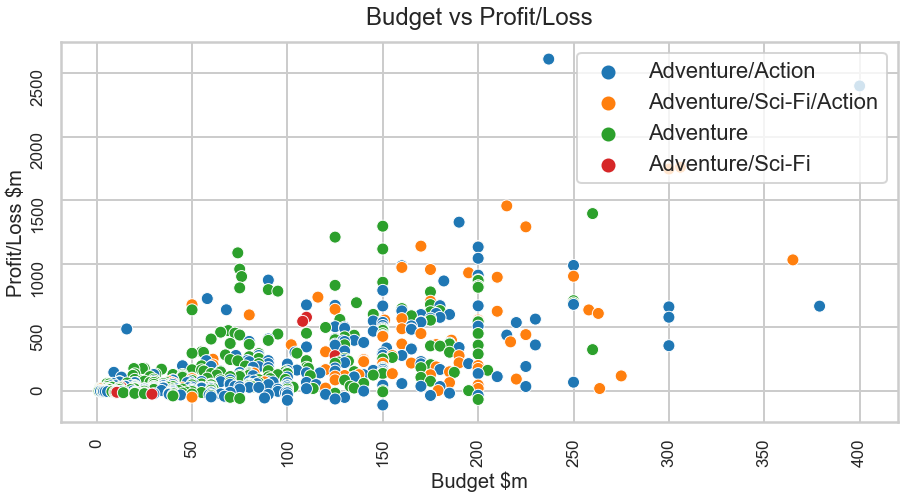

In [34]:
.+viz.budget_sub_scatter(adventure_all_s, 'adventure')

* <font color='red'> **The highest profits have generally been generated from budgets of between 150 and 250 million dollars**</font> 

### Which actor has been most profitable within the Adventure/Sci-Fi/Action genre?

In [35]:
adventure_sub_actor_profit_df = dprep.feature_v_financialMean_df_maker('Actor_List', 'profit_loss_$', financial_attributes_join, genre_filter=['Adventure', 'Sci-Fi', 'Action'])
adventure_sub_actor_profit_df = adventure_sub_actor_profit_df[adventure_sub_actor_profit_df['Counts'] >1]
adventure_sub_actor_profit_df.head(2)

,Actor_List,release_year,release_day,budget_$,domestic_box_office_$,worldwide_box_office_$,profit_loss_$,return_pct,domestic_%,Run_Time,MetacriticRating,RottenRating,imdbRating,imdb_votes,mean_rating,Counts
4,Mark Ruffalo,2016.5,23.5,332.5,568.910675,1719.928751,1387.428751,431.896066,33.048771,145.0,67.0,80.5,78.5,857939.5,75.333333,2.0
5,Chris Pratt,2016.5,7.5,192.5,535.013193,1489.156986,1296.656986,673.171553,35.494177,126.0,55.0,59.0,66.0,441753.5,60.000000,2.0


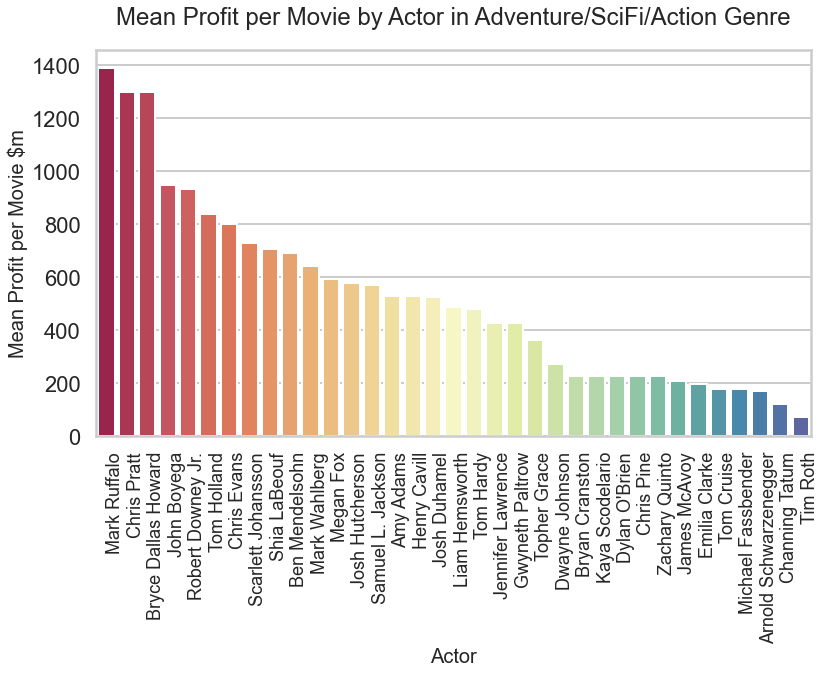

In [36]:
viz.seaborn_bar(adventure_sub_actor_profit_df, 'Actor_List', 'profit_loss_$', 'Actor', 'Mean Profit per Movie $m', 'Mean Profit per Movie by Actor in Adventure/SciFi/Action Genre', 'images/ad_scifi_prof_v_actor.png', rotation =90);

* <font color='red'> **Mark Ruffalo, Chris Pratt, Bryce Dallas Howard, John Boyega and Robert Downey Jr. have been the most profitable actors in the genre**</font> 

### Which director has been most profitable within the Adventure/Sci-Fi/Action genre?

In [37]:
adventure_sub_director_profit_df = dprep.feature_v_financialMean_df_maker('Director_List', 'profit_loss_$', financial_attributes_join, genre_filter=['Adventure', 'Sci-Fi', 'Action'])
adventure_sub_director_profit_df = adventure_sub_director_profit_df[adventure_sub_director_profit_df['Counts'] >1]
adventure_sub_director_profit_df.head(2)

,Director_List,release_year,release_day,budget_$,domestic_box_office_$,worldwide_box_office_$,profit_loss_$,return_pct,domestic_%,Run_Time,MetacriticRating,RottenRating,imdbRating,imdb_votes,mean_rating,Counts
1,Joss Whedon,2013.5,23.5,295.0,541.181889,1455.208595,1160.208595,427.828248,37.019593,142.0,67.5,83.500000,76.500000,1050145.5,75.833333,2.0
4,Anthony Russo,2016.0,25.0,240.0,448.882263,1303.620311,1063.620311,420.839107,34.995509,144.0,71.0,88.333333,79.666667,802618.0,79.666667,3.0


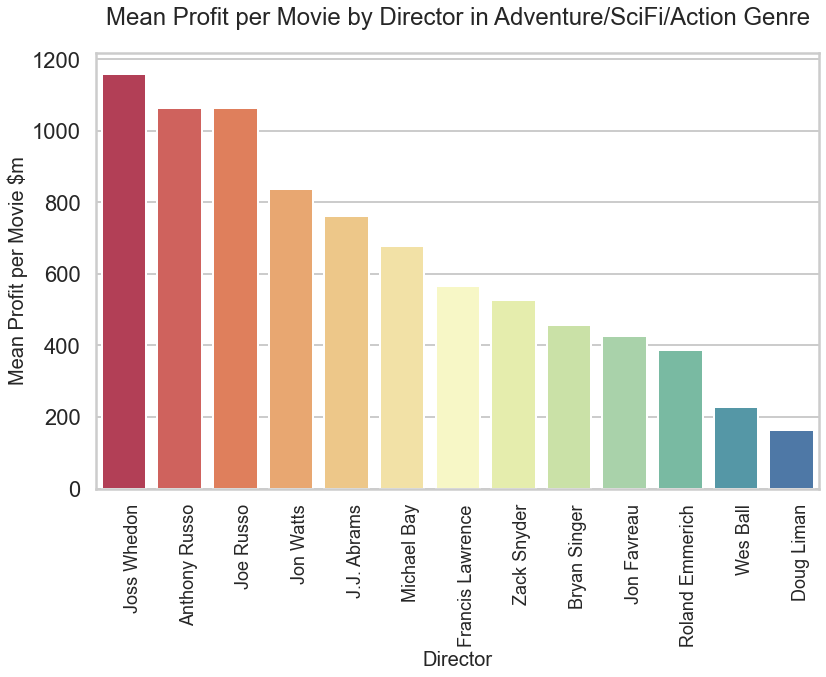

In [38]:
viz.seaborn_bar(adventure_sub_director_profit_df, 'Director_List', 'profit_loss_$', 'Director', 'Mean Profit per Movie $m', 'Mean Profit per Movie by Director in Adventure/SciFi/Action Genre', 'images/ad_scifi_prof_v_director.png', rotation =90);

* <font color='red'> **Josh Whedon, the Russo brothers, Jon Watts and J.J Abrams have been the most profitable directors in the genre**</font> 

### Which writer has been most profitable within the Adventure/Sci-Fi/Action genre?

In [39]:
adventure_sub_writer_profit_df = dprep.feature_v_financialMean_df_maker('Writer_List', 'profit_loss_$', financial_attributes_join, genre_filter=['Adventure', 'Sci-Fi', 'Action'])
adventure_sub_writer_profit_df = adventure_sub_writer_profit_df[adventure_sub_writer_profit_df['Counts'] >1]
adventure_sub_writer_profit_df.head(2)

,Writer_List,release_year,release_day,budget_$,domestic_box_office_$,worldwide_box_office_$,profit_loss_$,return_pct,domestic_%,Run_Time,MetacriticRating,RottenRating,imdbRating,imdb_votes,mean_rating,Counts
3,Colin Trevorrow,2016.5,7.5,192.5,535.013193,1489.156986,1296.656986,673.171553,35.494177,126.0,55.0,59.0,66.0,441753.5,60.000000,2.0
4,Joss Whedon,2013.5,23.5,295.0,541.181889,1455.208595,1160.208595,427.828248,37.019593,142.0,67.5,83.5,76.5,1050145.5,75.833333,2.0


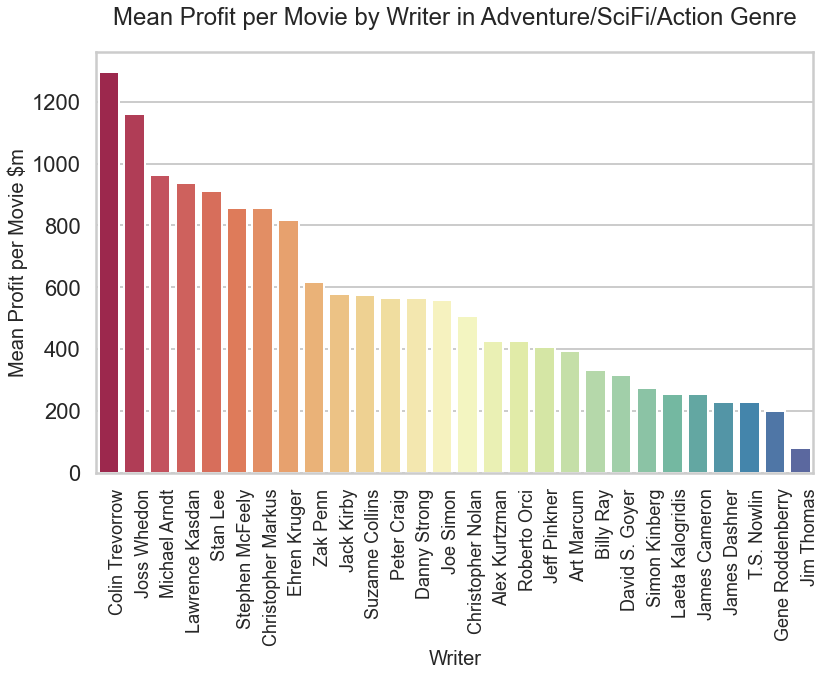

In [40]:
viz.seaborn_bar(adventure_sub_writer_profit_df, 'Writer_List', 'profit_loss_$', 'Writer', 'Mean Profit per Movie $m', 'Mean Profit per Movie by Writer in Adventure/SciFi/Action Genre', 'images/ad_scifi_prof_v_writer.png', rotation =90);

* <font color='red'> **Colin Trevorrow, Joss Whedon, Michael Arndt, Lawrence Kasdan and Stan Lee have been the most profitable writers in the genre**</font> 

### How do the top actors compare in terms of ROI, profitability and user ratings over all of their movies. And what budget are they used to working with?

In [41]:
def top_crew_list_maker(df, crew_column):
    return df[crew_column][:5].tolist()

In [42]:
top_a_actors = top_crew_list_maker(adventure_sub_actor_profit_df, 'Actor_List')
top_a_actors

['Mark Ruffalo',
 'Chris Pratt',
 'Bryce Dallas Howard',
 'John Boyega',
 'Robert Downey Jr.']

In [43]:
top_a_directors = top_crew_list_maker(adventure_sub_director_profit_df, 'Director_List')

In [44]:
top_a_writers = top_crew_list_maker(adventure_sub_writer_profit_df, 'Writer_List')

In [45]:
a_top_full_crew_df = dprep.make_crew_df(financial_attributes_join, top_a_actors, top_a_directors, top_a_writers)
a_top_full_crew_df.head(2)

,imdb_code,title,release_year,release_month,release_day,budget_$,domestic_box_office_$,worldwide_box_office_$,profit_loss_$,return_pct,...,Actor_List,Director_List,Writer_List,Rated,Run_Time,MetacriticRating,RottenRating,imdbRating,imdb_votes,mean_rating
0,tt4154796,Avengers: Endgame,2019,Apr,23,400000000,858373000,2797800564,2397800564,599.450141,...,"[Robert Downey Jr., Chris Evans, Mark Ruffalo]","[Anthony Russo, Joe Russo]","[Christopher Markus, Stephen McFeely, Stan Lee]",PG-13,181.0,78.0,94.0,84.0,937294.0,85.333333
2,tt2395427,Avengers: Age of Ultron,2015,Apr,22,365000000,459005868,1395316979,1030316979,282.278624,...,"[Robert Downey Jr., Chris Evans, Mark Ruffalo]",[Joss Whedon],"[Joss Whedon, Stan Lee, Jack Kirby]",PG-13,141.0,66.0,76.0,73.0,792951.0,71.666667


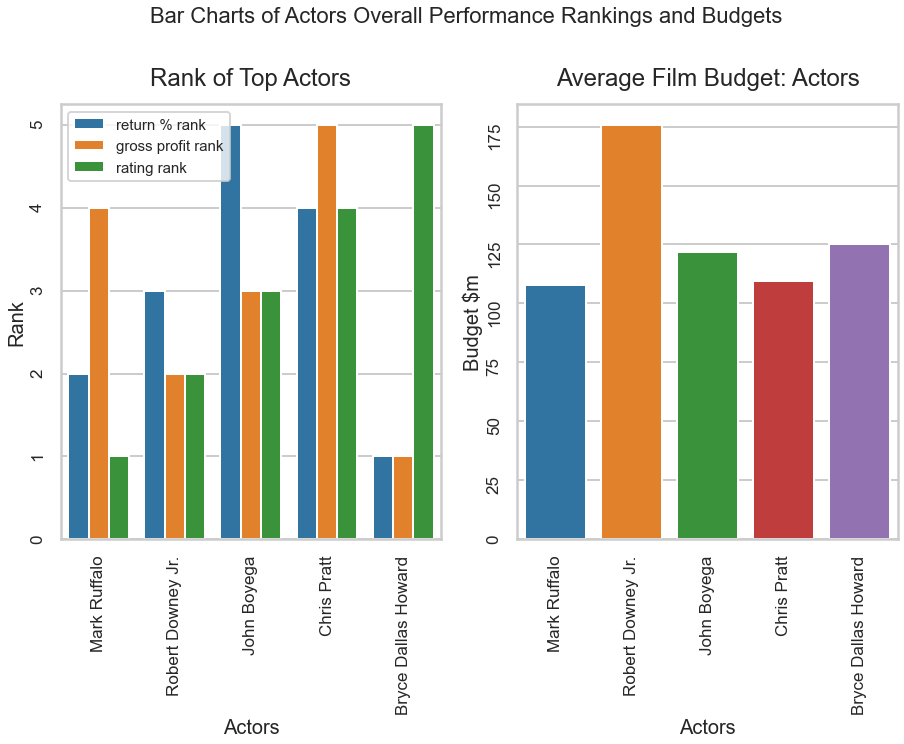

In [46]:
a_actor_chart = viz.graph_generator(a_top_full_crew_df, 'Actor_List', top_a_actors, 'Actors', 'ad')

* <font color='red'> **Mark Ruffalo is the top performing actor in terms of user ratings of his movies and 2nd in ROI of his movies. Bryce Dallas Howard is the top performing actor in terms of her movies' ROI and profitability, but is the lowest ranked in terms of their user ratings**<br>
* **Mark Ruffalo works in movies with a mean budget of a
just over 100 million dollars, while Bryce Dallas Howard works in movies with a mean budget of around 125 million dollars**</font> 

### How do the top directors compare in terms of ROI, profitability and user ratings over all of their movies. And what budget are they used to working with?

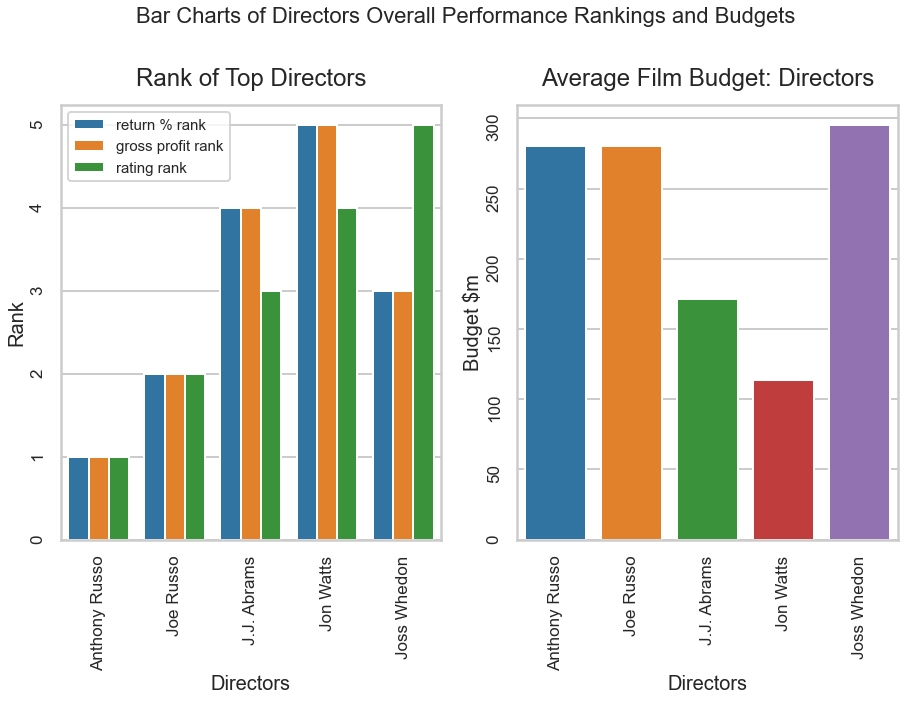

In [47]:
a_director_chart = viz.graph_generator(a_top_full_crew_df, 'Director_List', top_a_directors, 'Directors', 'ad')

* <font color='red'> **The Russo brothers have been the most profitable and best user rated directors, with Joss Whedon the next most profitable director**
* **The Russo brothers operate at budgets of around 275 million dollars, with Joss Whedon operating at around 290 million dollars** 
* **J.J.Abrams operates at a lower budget of around 160 million dollars and is third ranked in terms of profitablilty (albeit with the Russo brothers taking up 2 spots with the same movies, so 2nd ranked in reality) and 3rd ranked in terms of ratings (2nd taking into account the Russo brothers)** </font> 

### How do the top writers compare in terms of ROI, profitability and user ratings over all of their movies. And what budget are they used to working with?

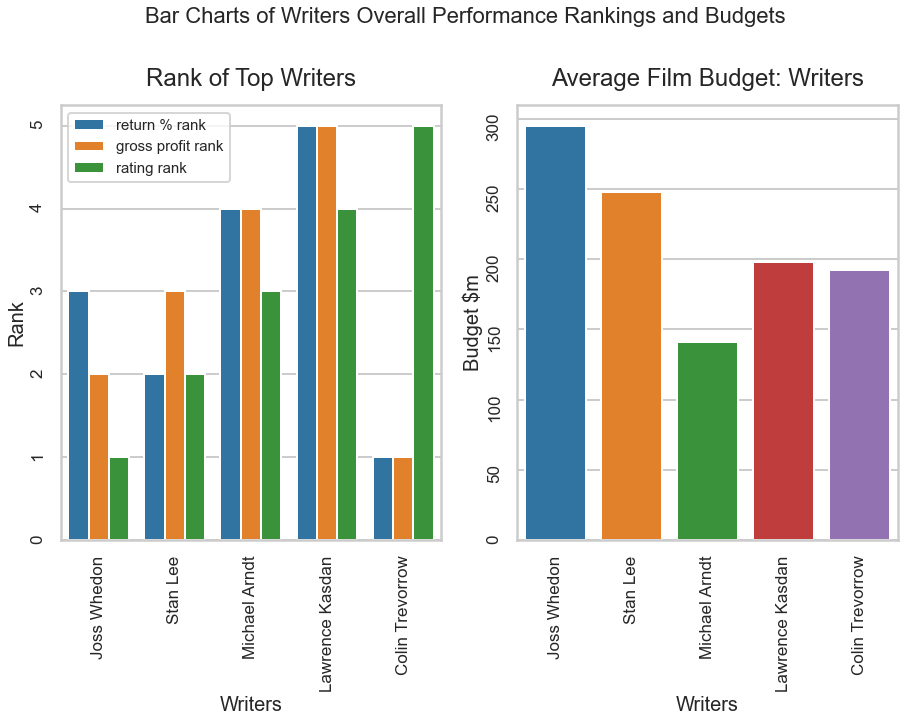

In [48]:
a_writer_chart = viz.graph_generator(a_top_full_crew_df, 'Writer_List', top_a_writers, 'Writers', 'ad')

* <font color='red'> **Colin Trevorrow has written the most profitable movies in the genre, but is lowest ranked in terms of user ratings. He generally works on movies with a budget of around 195 million dollars**
* **Joss Whedon is best rated by users and is ranked 2nd for gross mean profit and 3rd for ROI** <font> 

### How long are the most profitable Action/Adventure/Sci-Fi movies?

In [49]:
adventure_sub_runtime_profit_df = dprep.feature_v_financialMean_df_maker('Run_Time', 'profit_loss_$', financial_attributes_join, genre_filter=['Adventure', 'Sci-Fi', 'Action'])
adventure_sub_runtime_profit_df = adventure_sub_runtime_profit_df.reset_index()
adventure_sub_runtime_profit_df = adventure_sub_runtime_profit_df.sort_values(by='Run_Time')

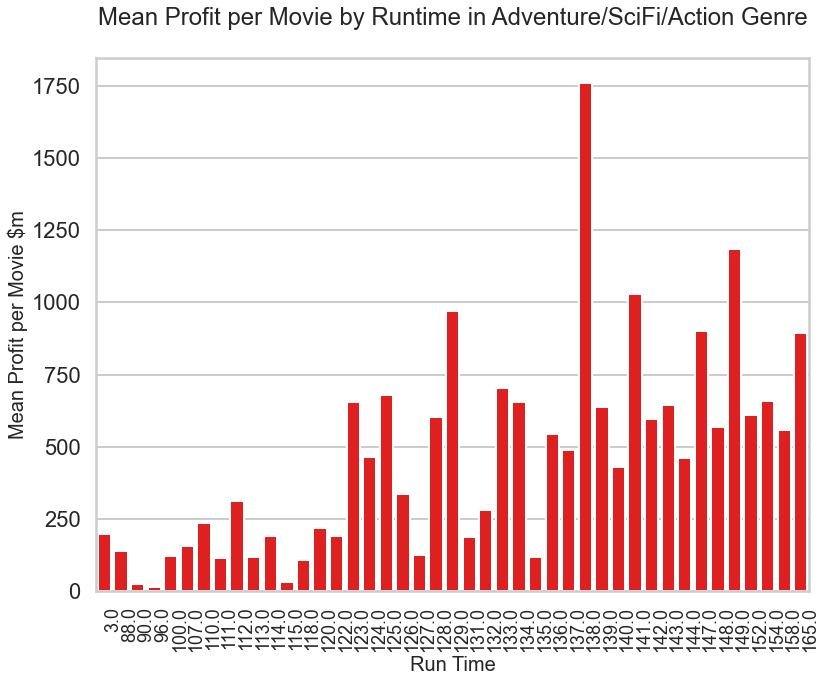

In [50]:
viz.seaborn_bar(adventure_sub_runtime_profit_df, 'Run_Time', 'profit_loss_$', 'Run Time', 'Mean Profit per Movie $m', 'Mean Profit per Movie by Runtime in Adventure/SciFi/Action Genre', 'images/ad_runtime_rank.png', rotation =90);

* <font color='red'> **The most profitable movies in the genre tend to be on the longer side, with those over 128 mins scoring highly, and those 138 mins or over scoring particularly highly**

### What months saw the most profitable releases in the genre?

In [51]:
adventure_sub_month_profit_df = dprep.feature_v_financialMean_df_maker('release_month', 'profit_loss_$', financial_attributes_join, genre_filter=['Adventure', 'Sci-Fi', 'Action'])

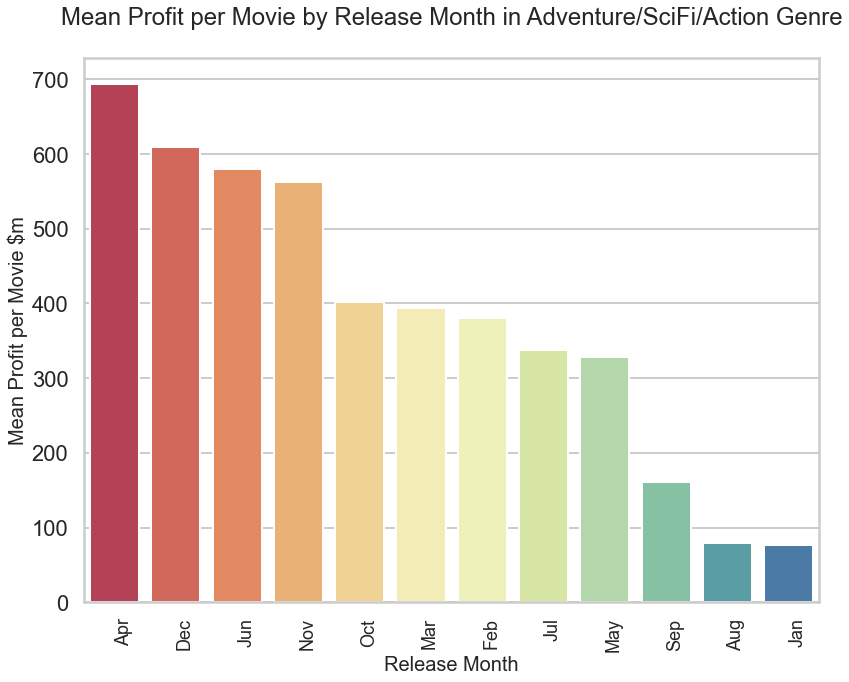

In [52]:
viz.seaborn_bar(adventure_sub_month_profit_df, 'release_month', 'profit_loss_$', 'Release Month', 'Mean Profit per Movie $m', 'Mean Profit per Movie by Release Month in Adventure/SciFi/Action Genre', 'images/ad_month_rank.png', rotation =90);

* <font color='red'> **The most profitable release months were April, December, November and June**

### What are the most profitable movies in the genre?

In [53]:
adventure_sub_title_profit_df = dprep.feature_v_financialMean_df_maker('title', 'profit_loss_$', financial_attributes_join, genre_filter=['Adventure', 'Sci-Fi', 'Action'])
adventure_sub_title_profit_df = adventure_sub_title_profit_df[:20]

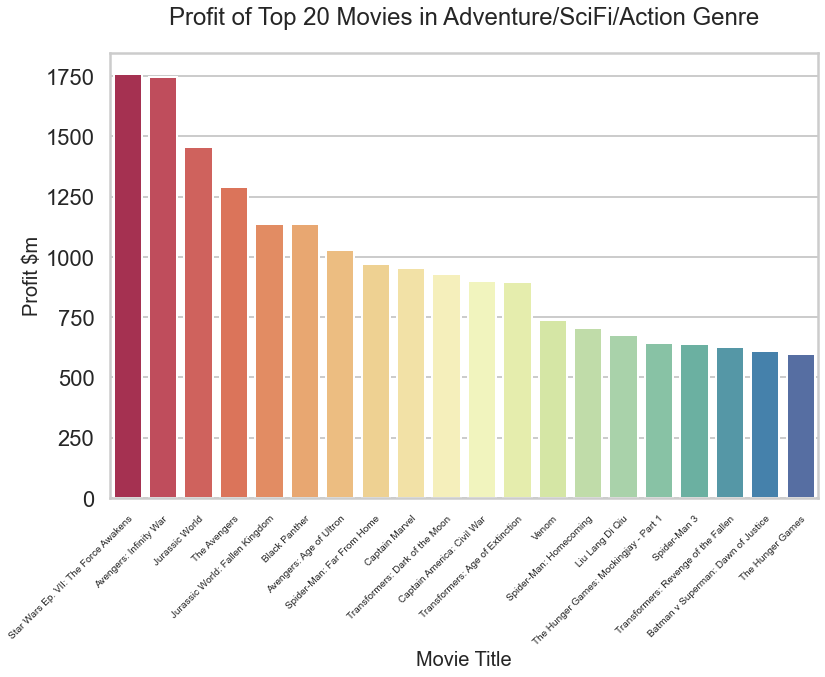

In [54]:
viz.seaborn_bar(adventure_sub_title_profit_df, 'title', 'profit_loss_$', 'Movie Title', 'Profit $m', 'Profit of Top 20 Movies in Adventure/SciFi/Action Genre', 'images/ad_title_rank.png', f=10, rotation =45);

* <font color='red'> **Star Wars VII, Avengers, Jurassic World and Black Panther are the most profitable movies. Superhero movies dominate the genre**

### Which subgenre within the Horror genre has produced the movies with the highest mean profits?

<font color='red'> **FOR THE LOWER BUDGET CHOICE, WE WILL PERFORM THE SAME ANALYSIS BUT FOR THE HORROR GENRE**

<img src="images/scared.jpg" style="width: 700px;"/>

In [55]:
horror_genre_profit_df = dprep.feature_v_financialMean_df_maker('Genre_List', 'return_pct', financial_attributes_join, genre_filter=['Horror'])
horror_genre_profit_df.head(2)

,Genre_List,release_year,release_day,budget_$,domestic_box_office_$,worldwide_box_office_$,profit_loss_$,return_pct,domestic_%,Run_Time,MetacriticRating,RottenRating,imdbRating,imdb_votes,mean_rating,Counts
0,Mystery,2014.050505,15.717172,13.807071,38.734601,81.519504,67.712433,891.006867,51.507444,98.111111,46.653061,43.092784,57.545455,94969.919192,48.927835,99.0
1,Thriller,2013.142857,15.791209,14.081868,37.186638,76.482358,62.400490,719.622698,52.903399,98.494505,46.068182,43.831461,57.175824,92052.692308,49.551724,91.0


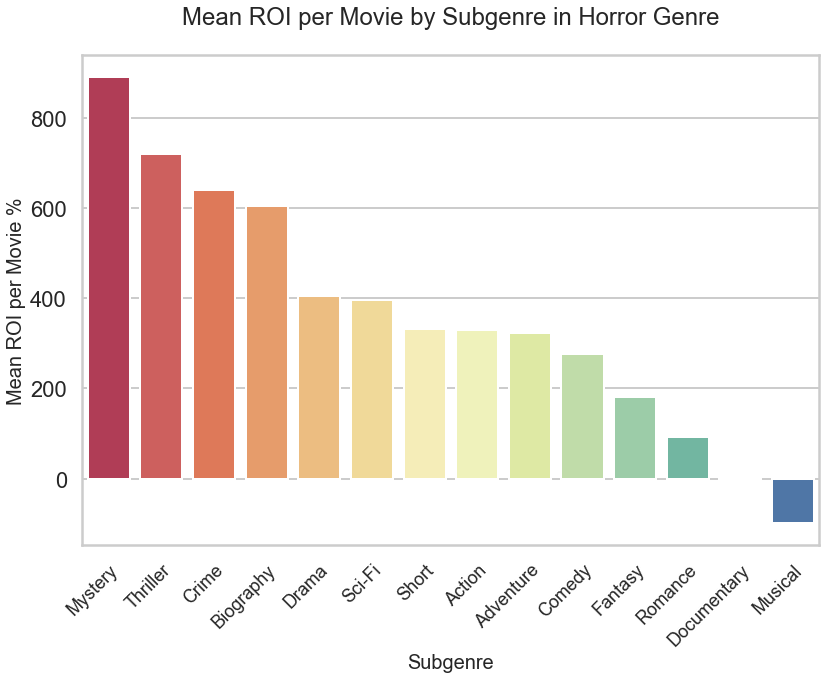

In [56]:
viz.seaborn_bar(horror_genre_profit_df, 'Genre_List', 'return_pct', 'Subgenre', 'Mean ROI per Movie %', 'Mean ROI per Movie by Subgenre in Horror Genre', 'images/ho_budget_v_genre.png');

* <font color='red'> **The Mystery  subgenre has produced the most profitable movies in the Horror genre**

### Which subgenre within the Horror/Mystery genre has produced the movies with the highest mean profits?

In [57]:
horror_sub1_genre_profit_df = dprep.feature_v_financialMean_df_maker('Genre_List', 'return_pct', financial_attributes_join, genre_filter=['Horror', 'Mystery'])
horror_sub1_genre_profit_df = horror_sub1_genre_profit_df[horror_sub1_genre_profit_df['Counts'] >2]
horror_sub1_genre_profit_df.head(2)

,Genre_List,release_year,release_day,budget_$,domestic_box_office_$,worldwide_box_office_$,profit_loss_$,return_pct,domestic_%,Run_Time,MetacriticRating,RottenRating,imdbRating,imdb_votes,mean_rating,Counts
1,Thriller,2013.883721,14.883721,12.118605,51.190483,106.218632,94.100027,1165.086848,52.235425,98.813953,46.906977,43.581395,57.674419,108969.976744,49.387597,43.0
3,Crime,2009.800000,24.400000,13.560000,44.076893,102.508546,88.948546,776.823304,49.144825,91.200000,30.600000,19.000000,58.600000,105113.000000,36.066667,5.0


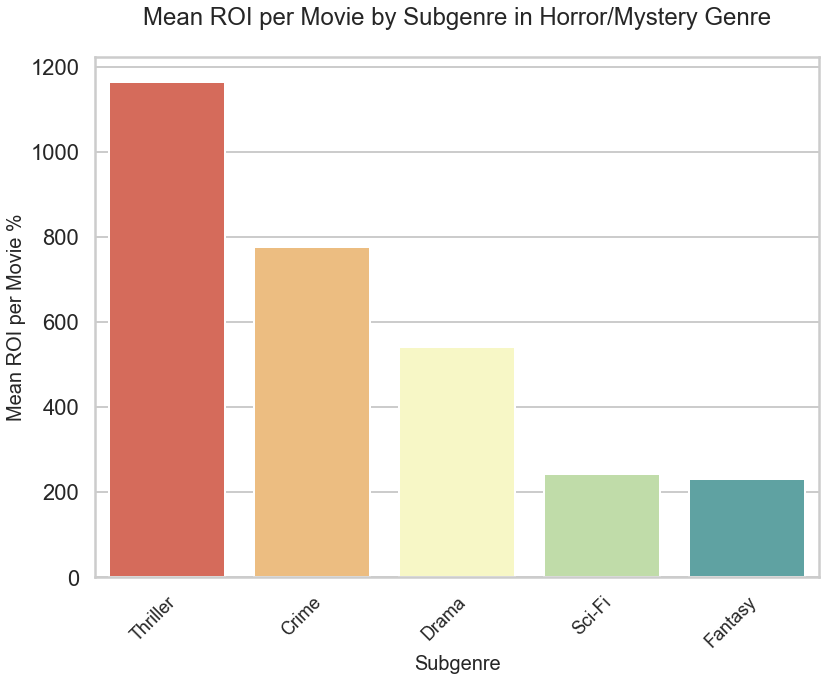

In [58]:
viz.seaborn_bar(horror_sub1_genre_profit_df, 'Genre_List', 'return_pct', 'Subgenre', 'Mean ROI per Movie %', 'Mean ROI per Movie by Subgenre in Horror/Mystery Genre', 'images/ho_my_budget_v_genre.png');

* <font color='red'> **The Thriller  subgenre has produced the most profitable movies in the Horror/Mystery genre**

### Which budgets have produced the most profitable movies within the Horror/Mystery/Thriller genre?

In [59]:
add_horror_list=[]
for index, row in financial_attributes_join.iterrows():
    if 'Horror' in row['Genre_List']:
        add_horror_list.append(row)
horror_all = pd.DataFrame(add_horror_list)
horror_all_s = dprep.budget_prep(horror_all, 'horror')
horror_all_s.head(2)


,imdb_code,title,release_year,release_month,release_day,budget_$,domestic_box_office_$,worldwide_box_office_$,profit_loss_$,return_pct,...,Director_List,Writer_List,Rated,Run_Time,MetacriticRating,RottenRating,imdbRating,imdb_votes,mean_rating,subgenre
883,tt1396484,It,2017,Aug,31,35.0,328828874,701083042,666.083042,1903.094406,...,[Andy Muschietti],"[Chase Palmer, Cary Joji Fukunaga, Gary Dauber...",R,135.0,69.0,86.0,73.0,487973.0,76.000000,Horror
450,tt7349950,It: Chapter Two,2019,Sep,4,70.0,211593228,469566806,399.566806,570.809723,...,[Andy Muschietti],"[Stephen King, Gary Dauberman]",R,169.0,58.0,62.0,65.0,229109.0,61.666667,Horror


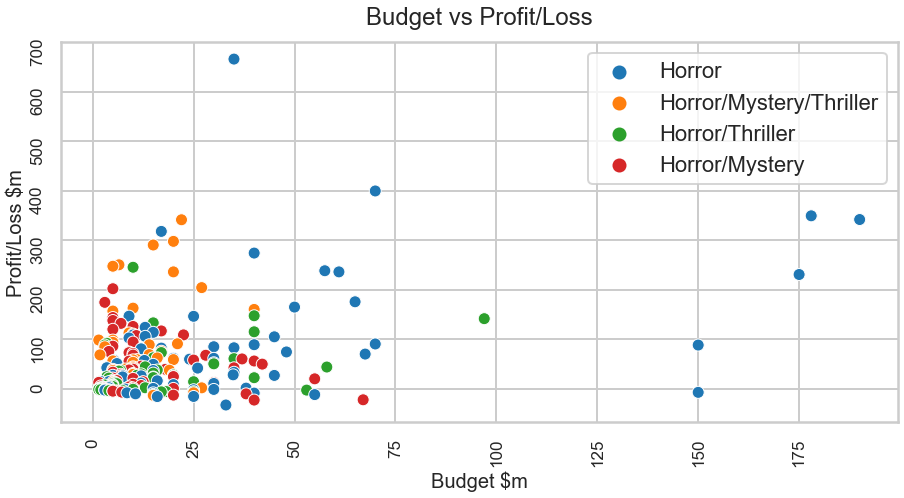

In [60]:
viz.budget_sub_scatter(horror_all_s, 'horror')

* <font color='red'> **The most profitable Horror/Thriller/Mysteries have been made on a budget of between 20 to 25 million dollars**

### Which actor has been most profitable within the Horror/Mystery/Thriller genre?

In [61]:
horror_sub_actor_profit_df = dprep.feature_v_financialMean_df_maker('Actor_List', 'profit_loss_$', financial_attributes_join, genre_filter=['Horror', 'Mystery', 'Thriller'])
horror_sub_actor_profit_df = horror_sub_actor_profit_df[horror_sub_actor_profit_df['Counts'] >1]
horror_sub_actor_profit_df.head(2)

,Actor_List,release_year,release_day,budget_$,domestic_box_office_$,worldwide_box_office_$,profit_loss_$,return_pct,domestic_%,Run_Time,MetacriticRating,RottenRating,imdbRating,imdb_votes,mean_rating,Counts
17,Patrick Wilson,2015.4,13.00,18.70,82.942681,202.200895,183.500895,2468.448030,42.751170,107.80,53.2,62.2,66.20,215377.4,60.533333,5.0
18,Vera Farmiga,2015.5,18.75,26.75,79.678514,206.995375,180.245375,734.899481,40.215726,113.25,54.0,65.5,66.75,206479.5,62.083333,4.0


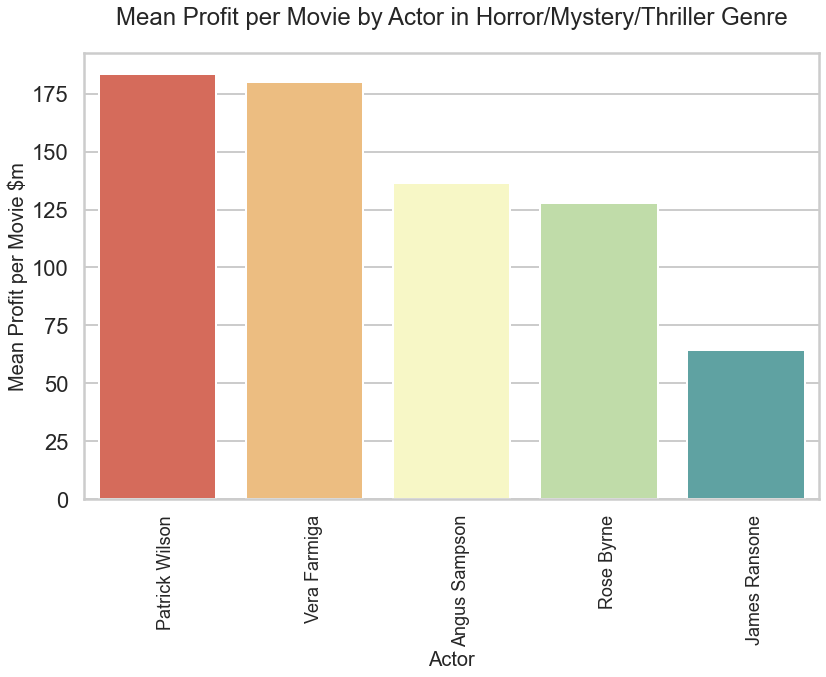

In [62]:
viz.seaborn_bar(horror_sub_actor_profit_df, 'Actor_List', 'profit_loss_$', 'Actor', 'Mean Profit per Movie $m', 'Mean Profit per Movie by Actor in Horror/Mystery/Thriller Genre', 'images/horr_subs_prof_v_actor.png', rotation =90);

* <font color='red'> **Patrick Wilson has been the most profitable actor in the genre, followed by Vera Farmiga, Angus Sampson, Rose Byrne and James Ransome**

### Which director has been most profitable within the Horror/Mystery/Thriller genre?

In [63]:
horror_sub_director_profit_df = dprep.feature_v_financialMean_df_maker('Director_List', 'profit_loss_$', financial_attributes_join, genre_filter=['Horror', 'Mystery', 'Thriller'])
horror_sub_director_profit_df = horror_sub_director_profit_df[horror_sub_director_profit_df['Counts'] >1]
horror_sub_director_profit_df.head(2)

,Director_List,release_year,release_day,budget_$,domestic_box_office_$,worldwide_box_office_$,profit_loss_$,return_pct,domestic_%,Run_Time,MetacriticRating,RottenRating,imdbRating,imdb_votes,mean_rating,Counts
3,Jordan Peele,2018.000000,22.000000,12.500000,175.562622,254.296027,241.796027,3065.231148,69.043452,110.0,83.000000,95.500000,72.500000,392766.000000,83.666667,2.0
5,James Wan,2012.333333,10.666667,8.833333,91.665246,193.178934,184.345601,3728.403792,49.647634,107.0,53.333333,63.666667,69.666667,308596.666667,62.222222,3.0


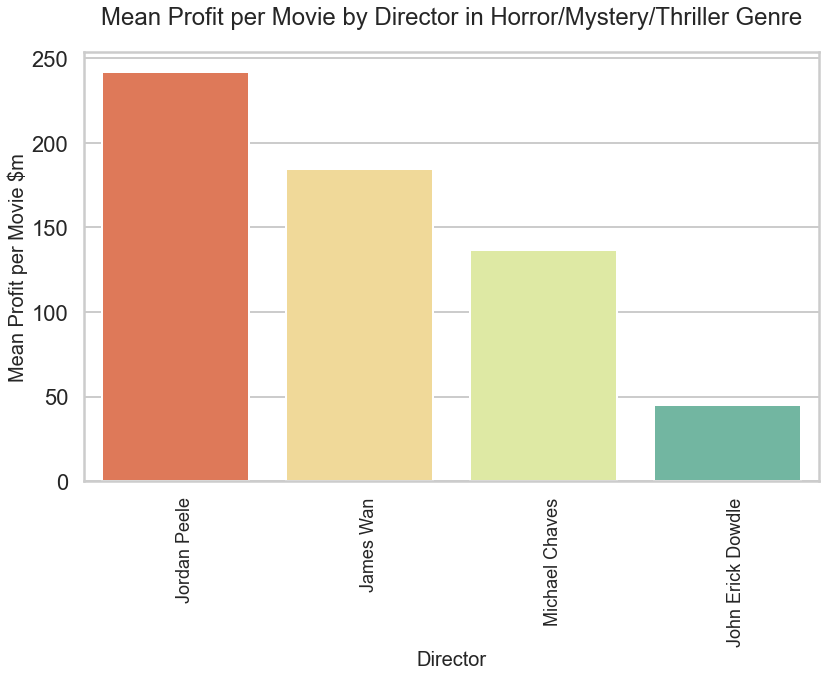

In [64]:
viz.seaborn_bar(horror_sub_director_profit_df, 'Director_List', 'profit_loss_$', 'Director', 'Mean Profit per Movie $m', 'Mean Profit per Movie by Director in Horror/Mystery/Thriller Genre', 'images/horr_subs_prof_v_director.png', rotation =90);

* <font color='red'> **Jordan Peele has been the most profitable director in the genre, followed by James Wan, Michael Chaves and John Erick Dowdle**

### Which writer has been most profitable within the Horror/Mystery/Thriller genre?

In [65]:
horror_sub_writer_profit_df = dprep.feature_v_financialMean_df_maker('Writer_List', 'profit_loss_$', financial_attributes_join, genre_filter=['Horror', 'Mystery', 'Thriller'])
horror_sub_writer_profit_df = horror_sub_writer_profit_df[horror_sub_writer_profit_df['Counts'] >1]
horror_sub_writer_profit_df.head(2)

,Writer_List,release_year,release_day,budget_$,domestic_box_office_$,worldwide_box_office_$,profit_loss_$,return_pct,domestic_%,Run_Time,MetacriticRating,RottenRating,imdbRating,imdb_votes,mean_rating,Counts
1,Gary Dauberman,2017.0,9.25,17.625,94.492181,289.223006,271.598006,2023.976906,32.656424,102.5,49.5,47.25,57.75,117388.75,51.500000,4.0
2,Jordan Peele,2018.0,22.00,12.500,175.562622,254.296027,241.796027,3065.231148,69.043452,110.0,83.0,95.50,72.50,392766.00,83.666667,2.0


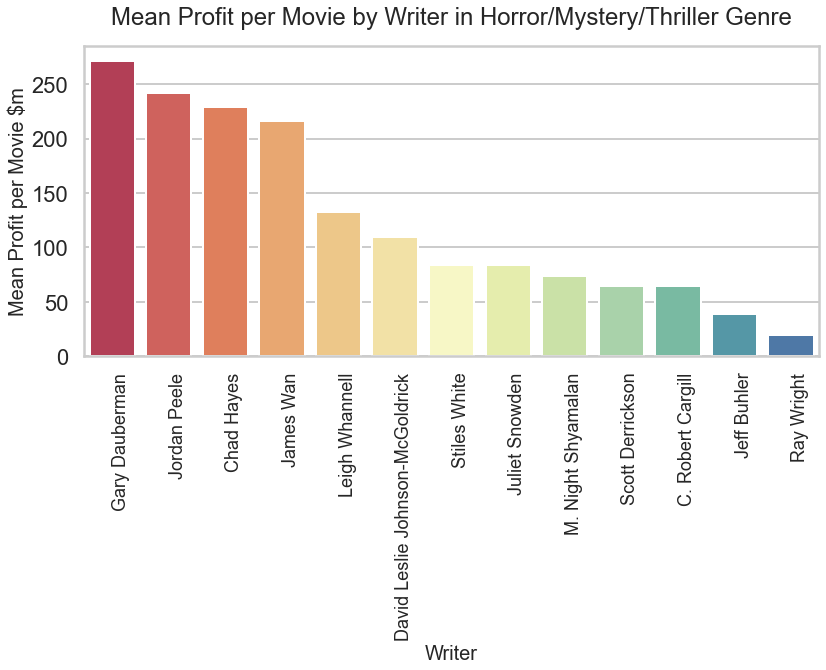

In [66]:
viz.seaborn_bar(horror_sub_writer_profit_df, 'Writer_List', 'profit_loss_$', 'Writer', 'Mean Profit per Movie $m', 'Mean Profit per Movie by Writer in Horror/Mystery/Thriller Genre', 'images/horr_subs_prof_v_writer.png', rotation =90);

* <font color='red'> **Gary Dauberman has been the most profitable writer in the genre, followed by Jordan Peele, Chad Hayes, James Wan and Leigh Whannell**

### How do the top actors compare in terms of ROI, profitability and user ratings over all their movies. And what budget are they used to working with?

In [67]:
top_h_actors = top_crew_list_maker(horror_sub_actor_profit_df, 'Actor_List')
top_h_actors

['Patrick Wilson',
 'Vera Farmiga',
 'Angus Sampson',
 'Rose Byrne',
 'James Ransone']

In [68]:
top_h_directors = top_crew_list_maker(horror_sub_director_profit_df, 'Director_List')

In [69]:
top_h_writers = top_crew_list_maker(horror_sub_writer_profit_df, 'Writer_List')

In [70]:
h_top_full_crew_df = dprep.make_crew_df(financial_attributes_join, top_h_actors, top_h_directors, top_h_writers)
h_top_full_crew_df.head(2)

,imdb_code,title,release_year,release_month,release_day,budget_$,domestic_box_office_$,worldwide_box_office_$,profit_loss_$,return_pct,...,Actor_List,Director_List,Writer_List,Rated,Run_Time,MetacriticRating,RottenRating,imdbRating,imdb_votes,mean_rating
70,tt2820852,Furious 7,2015,Apr,1,190000000,353007020,1516881526,1326881526,698.358698,...,"[Vin Diesel, Paul Walker, Dwayne Johnson]",[James Wan],"[Chris Morgan, Gary Scott Thompson]",PG-13,137.0,67.0,82.0,71.0,374621.0,73.333333
123,tt3741700,Godzilla: King of the Monsters,2019,May,29,170000000,110500138,383299915,213299915,125.470538,...,"[Kyle Chandler, Vera Farmiga, Millie Bobby Brown]",[Michael Dougherty],"[Michael Dougherty, Zach Shields, Max Borenstein]",PG-13,132.0,48.0,42.0,60.0,166514.0,50.000000


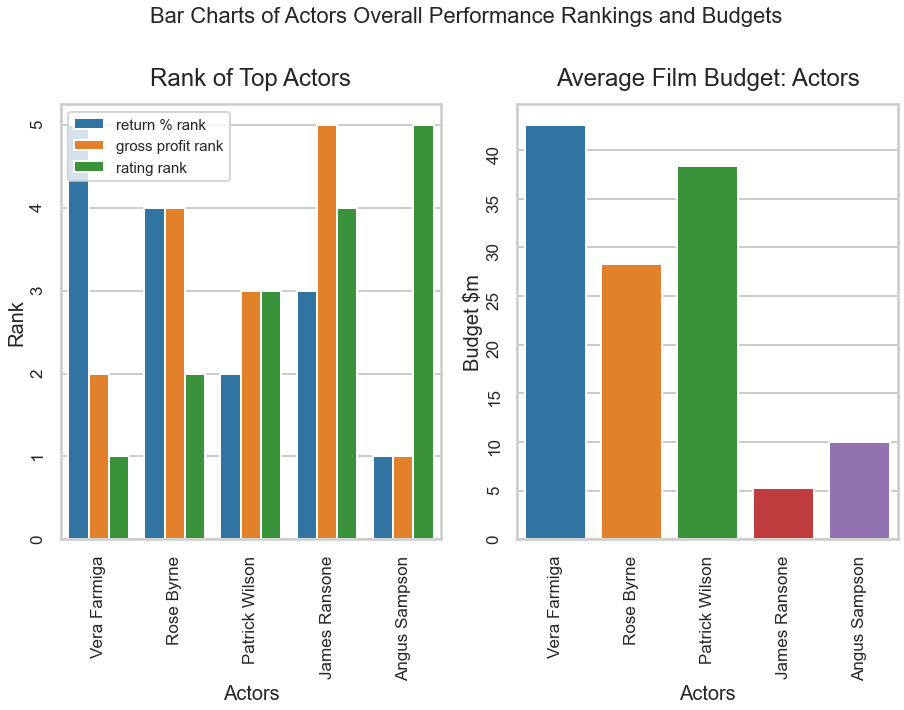

In [71]:
h_actor_chart = viz.graph_generator(h_top_full_crew_df, 'Actor_List', top_h_actors, 'Actors', 'ho')

* <font color='red'> **Angus Sampson has been the best ranked actor in the genre both in terms of profit/loss and ROI, but is the lowest ranked in terms of user ratings.**<br>
* **Vera Farmiga is the best ranked for user ratings, but the lowest for ROI. Rose Byrne is ranked 2nd for user ratings, and 4th for ROI and profit/loss, with Patrick Wilson 2nd for ROI and 3rd for profit/loss and user ratings**<br>
* **Rose Byrne is the only actor who operates around the 25 million budget mark** <font>

### How do the top directors compare in terms of ROI, profitability and user ratings over all their movies. And what budget are they used to working with?

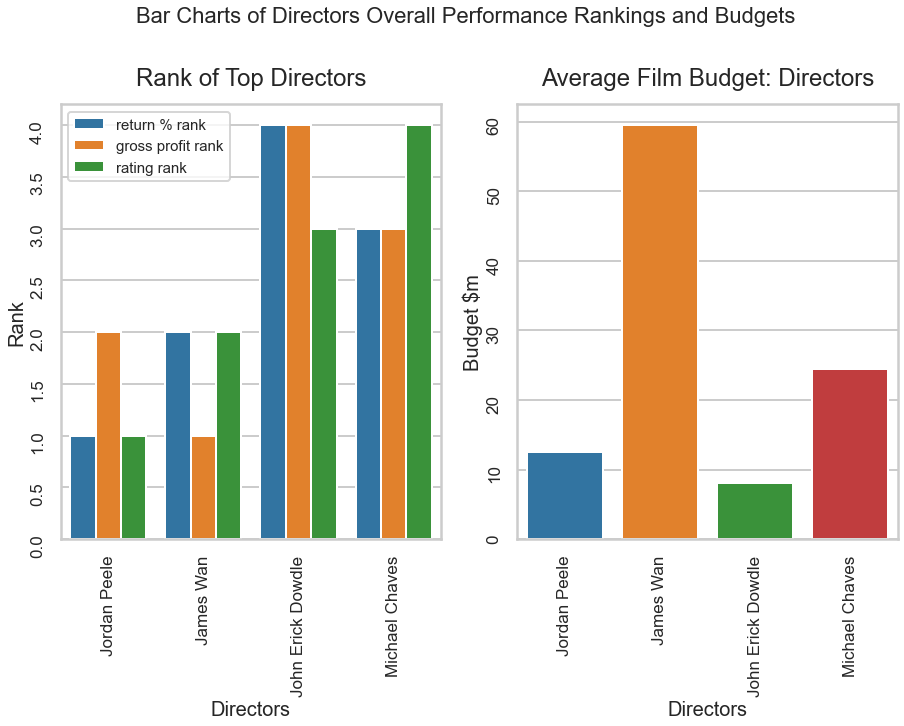

In [72]:
h_director_chart = viz.graph_generator(h_top_full_crew_df, 'Director_List', top_h_directors, 'Directors', 'ho')

* <font color='red'> **Jordan Peele is the best ranked director for ROI and for user ratings and is 2nd ranked for profit/loss**
* **James Wan is best ranked for profit/loss and 2nd ranked for ROI and user ratings**
* **James Wan operates with budgets of around 60 million dollars, and Jordan Peele around 12 million dollars** <font>

### How do the top writers compare in terms of ROI, profitability and user ratings over all their movies. And what budget are they used to working with?

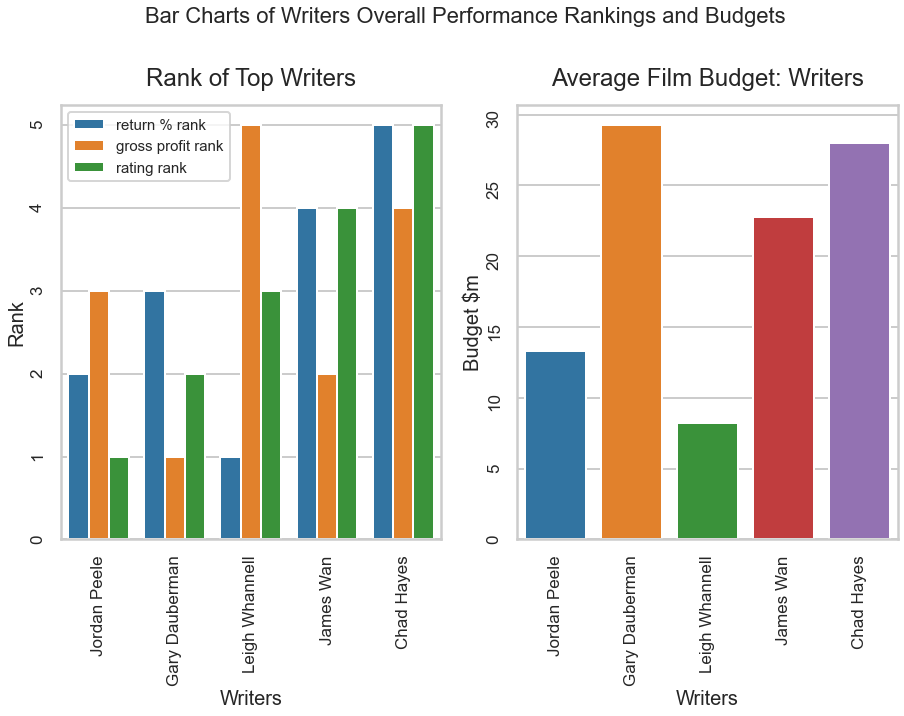

In [73]:
h_writer_chart = viz.graph_generator(h_top_full_crew_df, 'Writer_List', top_h_writers, 'Writers', 'ho')

* <font color='red'> **Jordan Peele is the best ranked writer in terms of user ratings, 2nd in terms of ROI and 3rd in terms of profit/loss**<br>
* **Gary Dauberman id best ranked in terms of profit/loss, 2nd in terms of user ratings and 3rd in terms of ROI.**<br>
* **James Wan, as a writer, operates with budgets of around 22 million dollars, Gary Dauberman around 29 million dollars and Jordan Peele around 12 million dollars**

### How long are the most profitable Horror/Mystery/Thriller movies?

In [74]:
horror_sub_runtime_profit_df = dprep.feature_v_financialMean_df_maker('Run_Time', 'profit_loss_$', financial_attributes_join, genre_filter=['Horror', 'Mystery', 'Thriller'])
horror_sub_runtime_profit_df = horror_sub_runtime_profit_df.reset_index()
horror_sub_runtime_profit_df = horror_sub_runtime_profit_df.sort_values(by='Run_Time')

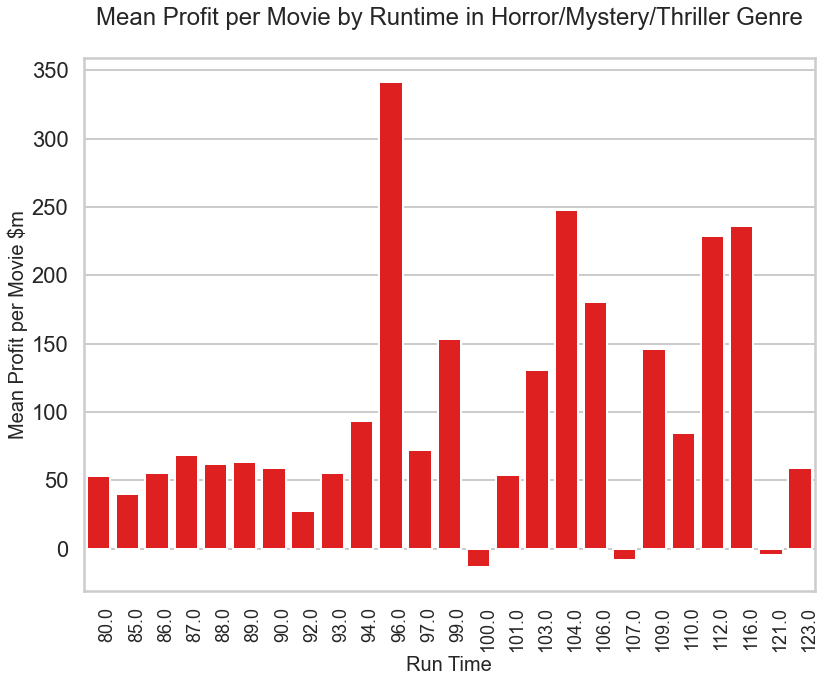

In [75]:
viz.seaborn_bar(horror_sub_runtime_profit_df, 'Run_Time', 'profit_loss_$', 'Run Time', 'Mean Profit per Movie $m', 'Mean Profit per Movie by Runtime in Horror/Mystery/Thriller Genre', 'images/ho_runtime_rank.png', rotation =90);

* <font color='red'> **The most profitable movies in this genre tend to be quite short, at between 96 and 116 mins**

### What months saw the most profitable releases in the genre?

In [76]:
horror_sub_month_profit_df = dprep.feature_v_financialMean_df_maker('release_month', 'profit_loss_$', financial_attributes_join, genre_filter=['Horror', 'Mystery', 'Thriller'])

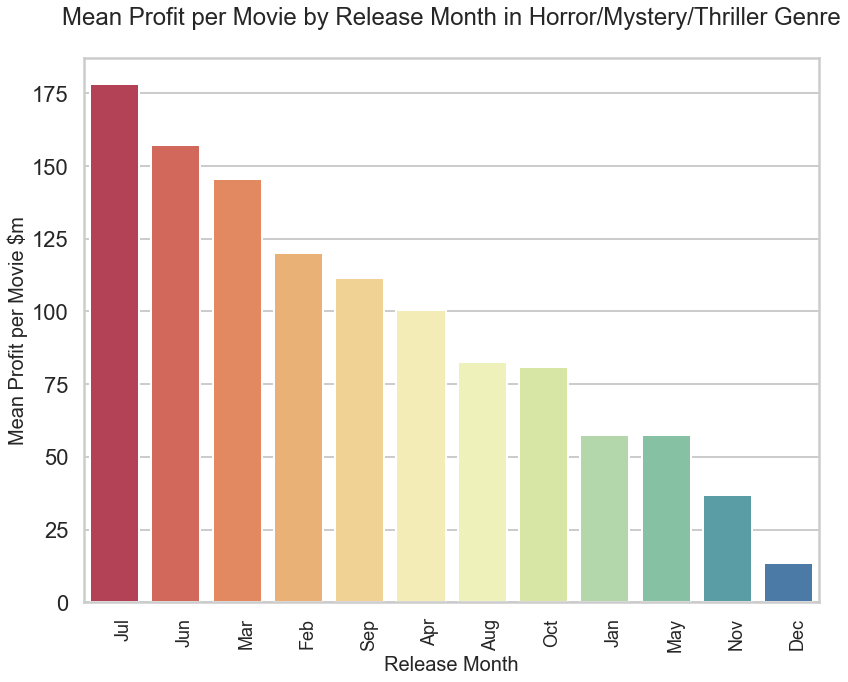

In [77]:
viz.seaborn_bar(horror_sub_month_profit_df, 'release_month', 'profit_loss_$', 'Release Month', 'Mean Profit per Movie $m', 'Mean Profit per Movie by Release Month in Horror/Mystery/Thriller Genre', 'images/ho_month_rank.png', rotation =90);

* <font color='red'> **The most profitable release months for movies in the genre were July, March and February**

### What are the most profitable movies in the genre?

In [78]:
horror_sub_title_profit_df = dprep.feature_v_financialMean_df_maker('title', 'profit_loss_$', financial_attributes_join, genre_filter=['Horror', 'Mystery', 'Thriller'])
horror_sub_title_profit_df = horror_sub_title_profit_df[:20]

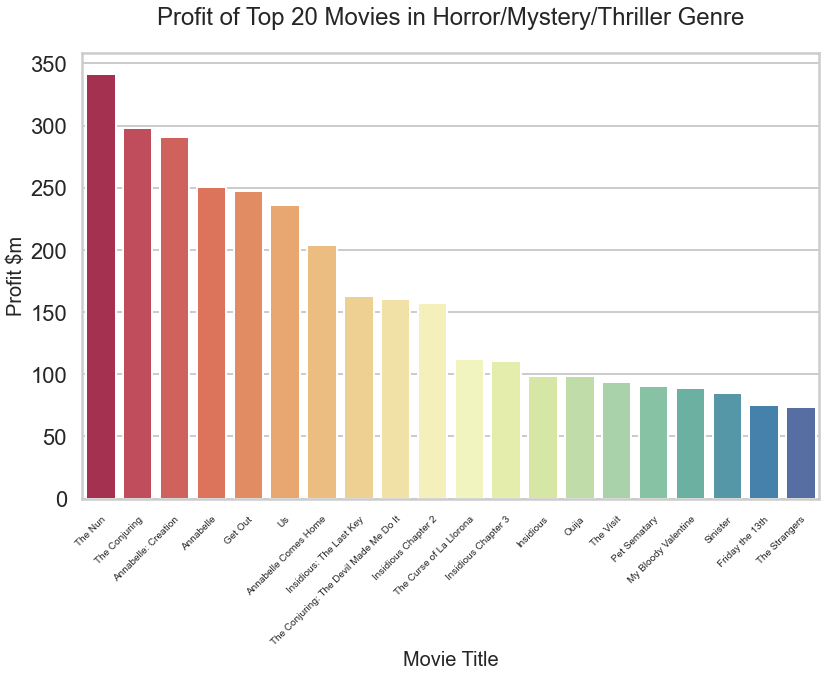

In [79]:
viz.seaborn_bar(horror_sub_title_profit_df, 'title', 'profit_loss_$', 'Movie Title', 'Profit $m', 'Profit of Top 20 Movies in Horror/Mystery/Thriller Genre', 'images/ho_title_rank.png', f=10, rotation =45);

* <font color='red'> **The Nun is the most profitable movie in the genre, followed by the Conjuring, Annabelle, Get Out and Us**<br>
* **Jordan Peele is behind two of the top six movies in the genre**

### What keywords are most associated with profitable Adventure/Sci-Fi/Action movies?

In [9]:
def wordcloud(text, mask_file, save_file):
    text = " ".join(text)
    mask = np.array(Image.open(mask_file))
    wordcloud = WordCloud(background_color="white", width=800, height=400, mask=mask, contour_width=3, min_font_size=12, contour_color='black')
    wordcloud.generate(text)
    wordcloud.to_file(save_file)
    fig, ax = plt.subplots(figsize=(20, 20))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.figure()
    plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [11]:
tmdb_key = dprep.get_tmdb_key()

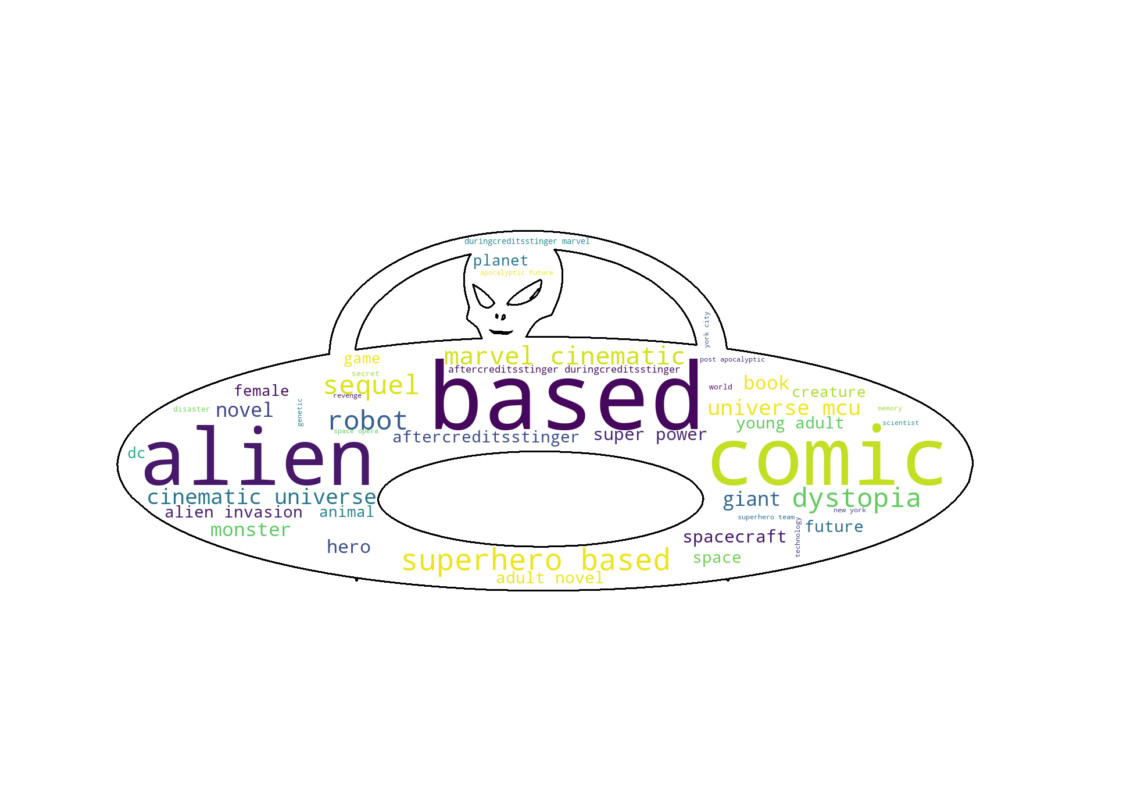

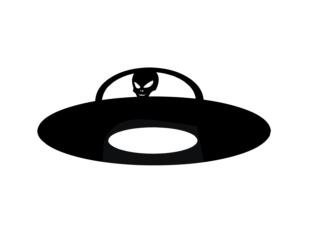

In [12]:
a_text = dprep.tmdb_genre_keywords(financial_attributes_hits_join, tmdb_key, ['Adventure', 'Sci-Fi', 'Action'])
wordcloud(a_text, "images/alien.png", "images/wcalien.png")

### What keywords are most associated with profitable Horror/Mystery/Thriller movies?

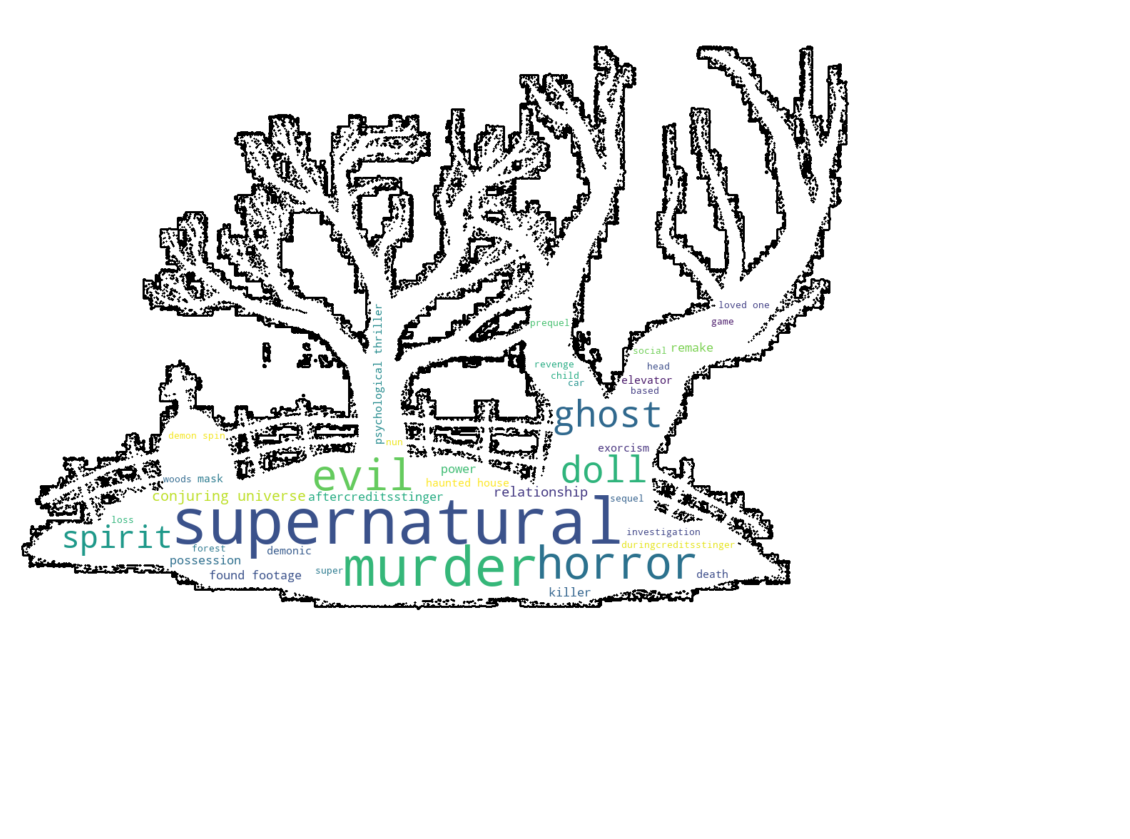

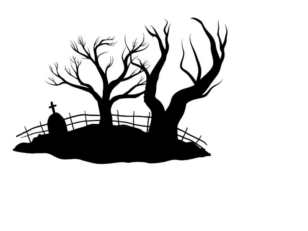

In [14]:
h_text = dprep.tmdb_genre_keywords(financial_attributes_hits_join, tmdb_key, ['Horror', 'Mystery', 'Thriller'])
wordcloud(h_text, "images/graveyard.jpg", "images/wcgyard.png")

## Conclusions

This analysis leads to the following recommendations for maximising the chances of producing successful movies:

**General Timing - The first movies should not be released until the world's top 10 markets have fully reopened from lockdown** - subject to the pandemic

**High Budget**
* **The studio's high budget movies should be in the Adventure/Sci-Fi/Action genre**
* **They should have a budget of between 150 and 250 million dollars**
* **The studio should target Mark Ruffalo and/or Bryce Dallas Howard as lead actors**
* **It should target Joss Whedon as director and writer, or JJ Abrams as director**
* **The movies should be over 137 minutes long and be released in April, December, November or June**

**Low Budget**
* **The studio's low budget movies should be in the Horror/Mystery/Thriller genre**
* **They should have a budget of between 20 and 25 million dollars**
* **The studio should target Rose Byrne and/or Patrick Wilson as lead actors**
* **It should target Jordan Peele as director and writer**
* **The movies should be between 96 and 116 minutes long and be released in July, June, March or February**


## Next steps

The results show that certain attributes do tend to increase the chances of success, but we would need to do some more analysis to quantify which features have the most weight 

I made the assumption that genre was the most important factor, as that seems intuitive, but a more comprehensive model may show a stronger link between the lead actors or director and success

It is also difficult to quantify the power of an established brand, a lot of the top ranking films are part of a 'universe', such as Marvel or DC, that have decades of recognition to draw on. More data on movies made by studios in similar circumstances would be helpful

Given the movie industry is given to trends, like most creative industries, it is difficult to assert with full confidence that what held true over the last 15 years will continue to do so over the next 15 years

It seems likely that a global event like the pandemic will affected people's tastes, but not necessarily in a predictable way, and we should be gathering as much data as possible now that people are returning to the cinema

We should commission surveys to try and capture the general mood of cinema-goers, something that can't be gleaned from the datasets we worked with

I would only be moderately confident of making these recommendations without these more detailed data